In [4]:
from pyforest import *
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score, classification_report,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans

In [2]:
df1=pd.read_csv("credit_card1.csv")

In [3]:
df1.drop(["ID"],axis=1,inplace=True)

In [4]:
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df1.SEX=df1.SEX.map({2: 'Female', 1:'Male'})

In [6]:
df1.EDUCATION=df1.EDUCATION.map({1:'GraduateSchool', 2:'University', 3:'HighSchool', 4:'Others', 0:'Others', 5:'Others', 6:'Others'})

In [7]:
df1.MARRIAGE=df1.MARRIAGE.map({1:'Married', 2:'Single', 3:'Others', 0:'Others'})

In [8]:
df1=pd.get_dummies(df1,drop_first=True)

In [9]:
df1.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,SEX_Male,EDUCATION_HighSchool,EDUCATION_Others,EDUCATION_University,MARRIAGE_Others,MARRIAGE_Single
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,1,0,0,0,1,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,0,0,0,0,1,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,0,0,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,1,0,0,1,0,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = df1.drop('DEFAULT',axis=1)
y = df1['DEFAULT']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_trainc = sm.add_constant(x_train)
x_testc = sm.add_constant(x_test)

In [12]:
logit_model = sm.Logit(y_train,x_trainc)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.464534
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20973
Method:                           MLE   Df Model:                           26
Date:                Wed, 29 Jan 2020   Pseudo R-squ.:                  0.1240
Time:                        20:29:45   Log-Likelihood:                -9755.2
converged:                       True   LL-Null:                       -11136.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1572      0.098    -11.794      0.000      -1.349      -0.965
LIMIT_BAL            -7.792e-07   1.89e-07     -4.114      0.000   -1.15e-06   -4.08e-07
AGE                      0.0071      0.002      3.192      0.001       0.003       0.011
PAY_1                    0.5771      0.021     27.279      0.000       0.536       0.619
PAY_2                    0.0935      0.024      3.861      0.000       0.046       0.141
PAY_3                    0.0738      0.027      2.700      0.007       0.020       0.127
PAY_4                    0.0327      0.030      1.094      0.274      -0.026       0.091
PAY_5                    0.0127      0.032      0.394      0.693      -0.050       0.076
PAY_6                    0.0220      0.026      0.842      0.400      -0.029       0.073
BILL_AMT1            -5.494e-06   1.35e-06     -4.077      0.000   -8.14e-06   -2.85e-06
BILL_AMT2             2.602e-06   1.77e-06      1.471      0.141   -8.66e-07    6.07e-06
BILL_AMT3             1.796e-06   1.55e-06      1.162      0.245   -1.23e-06    4.83e-06
BILL_AMT4             -5.79e-07   1.58e-06     -0.366      0.714   -3.68e-06    2.52e-06
BILL_AMT5            -1.811e-07   1.82e-06     -0.100      0.921   -3.74e-06    3.38e-06
BILL_AMT6             3.881e-07   1.45e-06      0.267      0.789   -2.46e-06    3.23e-06
PAY_AMT1             -1.013e-05   2.45e-06     -4.132      0.000   -1.49e-05   -5.32e-06
PAY_AMT2             -1.056e-05    2.6e-06     -4.055      0.000   -1.57e-05   -5.46e-06
PAY_AMT3             -2.055e-06   2.07e-06     -0.992      0.321   -6.11e-06    2.01e-06
PAY_AMT4              -2.05e-06   1.97e-06     -1.041      0.298   -5.91e-06    1.81e-06
PAY_AMT5             -3.023e-06   2.05e-06     -1.471      0.141   -7.05e-06       1e-06
PAY_AMT6             -2.535e-06   1.54e-06     -1.641      0.101   -5.56e-06    4.92e-07
SEX_Male                 0.1114      0.037      3.032      0.002       0.039       0.183
EDUCATION_HighSchool    -0.1154      0.057     -2.027      0.043      -0.227      -0.004
EDUCATION_Others        -1.0321      0.213     -4.846      0.000      -1.450      -0.615
EDUCATION_University    -0.0657      0.043     -1.545      0.122      -0.149       0.018
MARRIAGE_Others         -0.2267      0.158     -1.438      0.150      -0.536       0.082
MARRIAGE_Single         -0.1791      0.041     -4.324      0.000      -0.260      -0.098
========================================================================================
"""

In [13]:
y_prob = result.predict(x_testc)
y_prob.head()

2308     0.232375
22404    0.161950
23397    0.215560
25058    0.223813
2664     0.180670
dtype: float64

In [14]:
y_test_data = pd.DataFrame(y_test)
y_test_data['prob'] = y_prob

In [15]:
y_test_data['y_pred'] = y_test_data['prob'].apply(lambda x:1 if x>=0.5 else 0)
y_test_data.head()

,DEFAULT,prob,y_pred
2308,0,0.232375,0
22404,0,0.161950,0
23397,0,0.215560,0
25058,0,0.223813,0
2664,1,0.180670,0


In [16]:
cm = confusion_matrix(y_test_data['DEFAULT'],y_test_data['y_pred'])
cm

array([[6824,  216],
       [1501,  459]], dtype=int64)

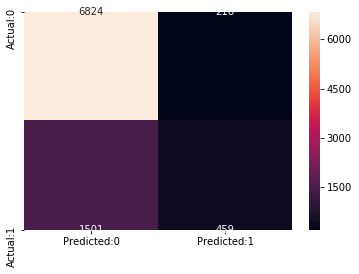

In [17]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='g')

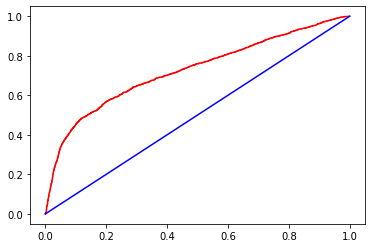

In [18]:
fpr,tpr,threshold = roc_curve(y_test_data['DEFAULT'],y_test_data['prob'])
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')
plt.show()

In [19]:
roc_auc_score(y_test_data['DEFAULT'],y_test_data['prob'])

0.7246060412801484

In [58]:
from sklearn.metrics import cohen_kappa_score,matthews_corrcoef,accuracy_score,classification_report

In [21]:
print("Cohen's Kappa",cohen_kappa_score(y_test_data['DEFAULT'],y_test_data['y_pred']))
print("Matthew's Correlation",matthews_corrcoef(y_test_data['DEFAULT'],y_test_data['y_pred']))
print(classification_report(y_test_data['DEFAULT'],y_test_data['y_pred']))
print(accuracy_score(y_test_data['DEFAULT'],y_test_data['y_pred']))

Cohen's Kappa 0.2665527552328065
Matthew's Correlation 0.3188884067750508
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.68      0.23      0.35      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000

0.8092222222222222


In [61]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [23]:
x=df1.drop(["DEFAULT"],axis=1)
y=df1["DEFAULT"]

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [25]:
modelrf=rf.fit(xtrain,ytrain)
ypred=modelrf.predict(xtest)

In [26]:
confusion_matrix(ytest,ypred)

array([[6595,  405],
       [1275,  725]], dtype=int64)

In [27]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7000
           1       0.64      0.36      0.46      2000

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.79      0.81      0.79      9000



In [28]:
print("Cohen's Kappa",cohen_kappa_score(ytest,ypred))
print("Matthew's Correlation",matthews_corrcoef(ytest,ypred))
print(accuracy_score(ytest,ypred))

Cohen's Kappa 0.360676532769556
Matthew's Correlation 0.3822332206376694
0.8133333333333334


In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight={1:70,0:30})

In [30]:
modellr=lr.fit(xtrain,ytrain)
ypredlr=modellr.predict(xtest)

In [31]:
confusion_matrix(ytest,ypredlr)

array([[6897,  103],
       [1909,   91]], dtype=int64)

In [32]:
print(classification_report(ytest,ypredlr))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      7000
           1       0.47      0.05      0.08      2000

    accuracy                           0.78      9000
   macro avg       0.63      0.52      0.48      9000
weighted avg       0.71      0.78      0.70      9000



In [33]:
print("Cohen's Kappa",cohen_kappa_score(ytest,ypredlr))
print("Matthew's Correlation",matthews_corrcoef(ytest,ypredlr))
print(accuracy_score(ytest,ypredlr))

Cohen's Kappa 0.045440168687401195
Matthew's Correlation 0.08812985321759548
0.7764444444444445


In [34]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [35]:
modelnb=nb.fit(xtrain,ytrain)
yprednb=modelnb.predict(xtest)

In [36]:
print(classification_report(ytest,yprednb))

              precision    recall  f1-score   support

           0       0.88      0.23      0.36      7000
           1       0.25      0.90      0.39      2000

    accuracy                           0.38      9000
   macro avg       0.57      0.56      0.38      9000
weighted avg       0.74      0.38      0.37      9000



In [37]:
print("Cohen's Kappa",cohen_kappa_score(ytest,yprednb))
print("Matthew's Correlation",matthews_corrcoef(ytest,yprednb))
print(accuracy_score(ytest,yprednb))

Cohen's Kappa 0.06445392175041731
Matthew's Correlation 0.12865406310104469
0.3771111111111111


In [38]:
sc=StandardScaler()

In [39]:
scaled_train=pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns)
scaled_test=pd.DataFrame(sc.fit_transform(xtest),columns=xtest.columns)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [41]:
modelknn=knn.fit(scaled_train,ytrain)
ypredknn=modelknn.predict(scaled_test)

In [42]:
print(classification_report(ytest,ypredknn))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      7000
           1       0.55      0.35      0.43      2000

    accuracy                           0.79      9000
   macro avg       0.69      0.63      0.65      9000
weighted avg       0.77      0.79      0.77      9000



In [43]:
print("Cohen's Kappa",cohen_kappa_score(ytest,ypredknn))
print("Matthew's Correlation",matthews_corrcoef(ytest,ypredknn))
print(accuracy_score(ytest,ypredknn))

Cohen's Kappa 0.30740664328450584
Matthew's Correlation 0.3201799559396239
0.7927777777777778


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import model_selection

In [45]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeClassifier()))
models.append(('ADB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))

In [47]:
X=x
Y=y
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=1)
    cv_results=model_selection.cross_val_score(model,X,Y,cv=kfold,scoring="recall_weighted")
    results.append(cv_results)
    names.append(name)
    print(name,"Result mean :",round(cv_results.mean(),3),"Std Deviation :",round(cv_results.std(),3))

KNN Result mean : 0.755 Std Deviation : 0.015
NB Result mean : 0.378 Std Deviation : 0.009
RFC Result mean : 0.818 Std Deviation : 0.013
DTR Result mean : 0.726 Std Deviation : 0.016
ADB Result mean : 0.816 Std Deviation : 0.013
GBM Result mean : 0.821 Std Deviation : 0.015


In [48]:
X=x
Y=y
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=1)
    cv_results=model_selection.cross_val_score(model,X,Y,cv=kfold,scoring="f1_weighted")
    results.append(cv_results)
    names.append(name)
    print(name,"Bias Error :",1-round(cv_results.mean(),3),"Variance Error :",round(cv_results.std(),3))

KNN Bias Error : 0.281 Variance Error : 0.017
NB Bias Error : 0.627 Variance Error : 0.015
RFC Bias Error : 0.20199999999999996 Variance Error : 0.013
DTR Bias Error : 0.272 Variance Error : 0.013
ADB Bias Error : 0.21099999999999997 Variance Error : 0.014
GBM Bias Error : 0.19999999999999996 Variance Error : 0.016


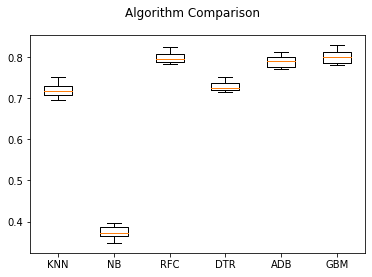

In [49]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [51]:
gbm=GradientBoostingClassifier(criterion='friedman_mse',init=None, learning_rate=0.1,loss='deviance', max_depth=8,max_features='sqrt'
                               ,max_leaf_nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,min_samples_leaf=50
                               ,min_samples_split=500,min_weight_fraction_leaf=0.0,n_estimators=20,n_iter_no_change=None
                               ,presort='auto',
                            random_state=10,
                                                  subsample=0.8, tol=0.0001,
                                                  validation_fraction=0.1,
                                                  verbose=0, warm_start=False)

In [52]:
modelgbm=gbm.fit(xtrain,ytrain)

In [53]:
ypredgbm=modelgbm.predict(xtest)

In [54]:
print(classification_report(ytest,ypredgbm))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7000
           1       0.68      0.32      0.44      2000

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000



In [55]:
print("Cohen's Kappa",cohen_kappa_score(ytest,ypredgbm))
print("Matthew's Correlation",matthews_corrcoef(ytest,ypredgbm))
print(accuracy_score(ytest,ypredgbm))

Cohen's Kappa 0.3442659035879374
Matthew's Correlation 0.37911433951120177
0.8161111111111111


In [56]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='f1_weighted',n_jobs=4,iid=False, cv=5)
gsearch1.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
    

In [57]:
gsearch1.best_params_

{'n_estimators': 40}

In [58]:
gsearch1.best_score_

0.8011496916562836

In [59]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [60]:
### RFE

In [61]:
x = df1.drop('DEFAULT',axis=1)
y = df1['DEFAULT']

In [62]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [99]:
from sklearn.feature_selection import RFECV #rfe
from sklearn.model_selection import StratifiedKFold #kfold
from sklearn.ensemble import RandomForestClassifier #estimator
import warnings
warnings.filterwarnings("ignore")

In [64]:
rf=RandomForestClassifier()

In [65]:
rfecv=RFECV(estimator=rf,step=1,cv=StratifiedKFold(10,random_state=0),scoring="f1_weighted")

In [67]:
#rfecv.fit(xtrain,ytrain)

In [330]:
print("Optimal Feature Count {}".format(rfecv.n_features_))

Optimal Feature Count 14


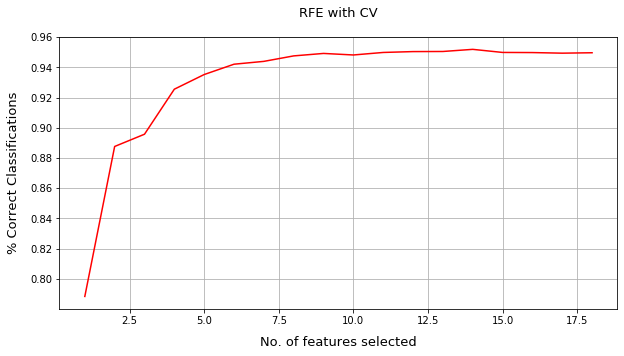

In [331]:
plt.figure(figsize=(10,5))
plt.title("RFE with CV",fontsize=13,pad=20)
plt.xlabel("No. of features selected",fontsize=13,labelpad=10)
plt.ylabel("% Correct Classifications",fontsize=13,labelpad=10)
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_,color="red",linewidth=1.5)
plt.grid(True)
plt.show()

In [332]:
print(np.where(rfecv.support_==False)[0])

[ 9 14 15 16]


In [333]:
x.iloc[:,np.where(rfecv.support_==False)[0]].columns

Index([9, 14, 15, 16], dtype='object')

In [68]:
xtrain1=xtrain.drop(['PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX_Male', 'EDUCATION_HighSchool',
       'EDUCATION_Others', 'EDUCATION_University', 'MARRIAGE_Others',
       'MARRIAGE_Single'],axis=1)

xtest1=xtest.drop(['PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX_Male', 'EDUCATION_HighSchool',
       'EDUCATION_Others', 'EDUCATION_University', 'MARRIAGE_Others',
       'MARRIAGE_Single'],axis=1)

In [69]:
model=rf.fit(xtrain1,ytrain)
ypred=model.predict(xtest1)

In [70]:
cm = confusion_matrix(ytest,ypred)
cm

array([[4422,  241],
       [ 862,  475]], dtype=int64)

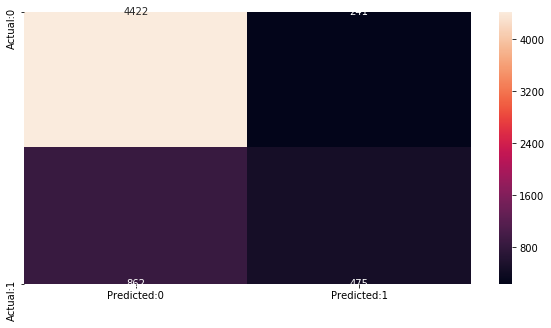

In [71]:
plt.figure(figsize=(10,5))
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='g')
plt.show()

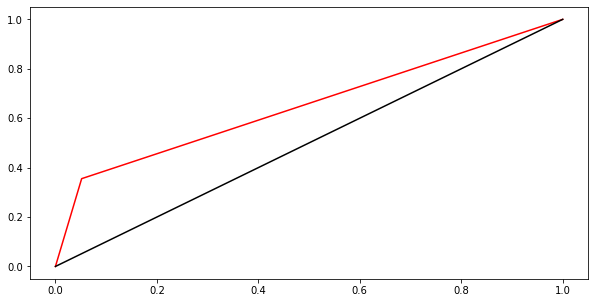

In [72]:
plt.figure(figsize=(10,5))
fpr,tpr,threshold = roc_curve(ytest,ypred)
plt.plot(fpr,tpr,color='red')
plt.plot(fpr,fpr,color='black')
plt.show()

In [73]:
roc_auc_score(ytest,ypred)

0.6517947668359791

In [74]:
print("Cohen's Kappa",cohen_kappa_score(ytest,ypred))
print("Matthew's Correlation",matthews_corrcoef(ytest,ypred))
print(classification_report(ytest,ypred))

Cohen's Kappa 0.363862792759609
Matthew's Correlation 0.38971515150513136
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4663
           1       0.66      0.36      0.46      1337

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.79      6000



In [75]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(rf, xtrain, ytrain, cv=kfolds, scoring='f1_weighted')
print('Bias Error in Random Forest after RFECV',1-r_scores.mean())
print('Variance Error in Random Forest after RFECV',r_scores.var())

Bias Error in Random Forest after RFECV 0.20319739390008018
Variance Error in Random Forest after RFECV 8.958123579244356e-05


In [76]:
### RFE - LR

In [77]:
x = df1.drop('DEFAULT',axis=1)
y = df1['DEFAULT']

In [78]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [79]:
from sklearn.feature_selection import RFECV #rfe
from sklearn.model_selection import StratifiedKFold #kfold
from sklearn.ensemble import RandomForestClassifier #estimator
import warnings
warnings.filterwarnings("ignore")

In [80]:
lr=LogisticRegression()

In [81]:
rfecv=RFECV(estimator=lr,step=1,cv=StratifiedKFold(10,random_state=0),scoring="f1_weighted")

In [82]:
rfecv.fit(xtrain,ytrain)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='f1_weighted', step=1,
      verbose=0)

In [83]:
print("Optimal Feature Count {}".format(rfecv.n_features_))

Optimal Feature Count 1


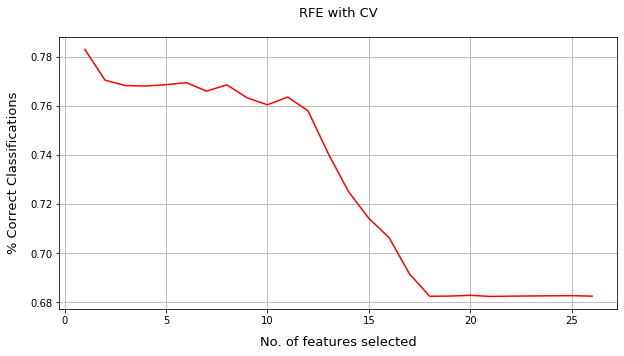

In [84]:
plt.figure(figsize=(10,5))
plt.title("RFE with CV",fontsize=13,pad=20)
plt.xlabel("No. of features selected",fontsize=13,labelpad=10)
plt.ylabel("% Correct Classifications",fontsize=13,labelpad=10)
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_,color="red",linewidth=1.5)
plt.grid(True)
plt.show()

In [85]:
print(np.where(rfecv.support_==False)[0])

[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


In [86]:
x.iloc[:,np.where(rfecv.support_==False)[0]].columns

Index(['LIMIT_BAL', 'AGE', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'SEX_Male', 'EDUCATION_HighSchool', 'EDUCATION_Others',
       'EDUCATION_University', 'MARRIAGE_Others', 'MARRIAGE_Single'],
      dtype='object')

In [87]:
xtrain1=xtrain.drop(['LIMIT_BAL', 'AGE', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'SEX_Male', 'EDUCATION_HighSchool', 'EDUCATION_University',
       'MARRIAGE_Others', 'MARRIAGE_Single'],axis=1)

xtest1=xtest.drop(['LIMIT_BAL', 'AGE', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'SEX_Male', 'EDUCATION_HighSchool', 'EDUCATION_University',
       'MARRIAGE_Others', 'MARRIAGE_Single'],axis=1)

In [88]:
df1.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT', 'SEX_Male',
       'EDUCATION_HighSchool', 'EDUCATION_Others', 'EDUCATION_University',
       'MARRIAGE_Others', 'MARRIAGE_Single'],
      dtype='object')

In [89]:
model=lr.fit(xtrain1,ytrain)
ypred=model.predict(xtest1)

In [90]:
cm = confusion_matrix(ytest,ypred)
cm

array([[4496,  167],
       [ 921,  416]], dtype=int64)

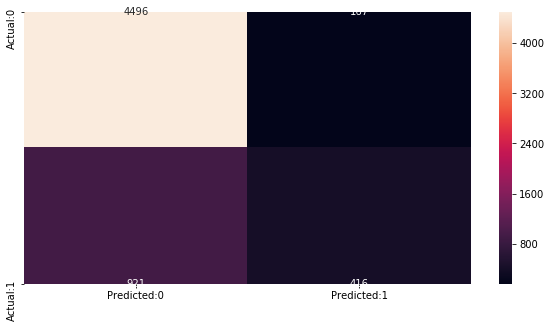

In [91]:
plt.figure(figsize=(10,5))
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='g')
plt.show()

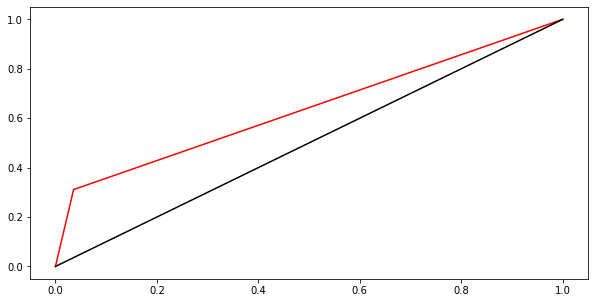

In [92]:
plt.figure(figsize=(10,5))
fpr,tpr,threshold = roc_curve(ytest,ypred)
plt.plot(fpr,tpr,color='red')
plt.plot(fpr,fpr,color='black')
plt.show()

In [93]:
roc_auc_score(ytest,ypred)

0.6376652496434718

In [94]:
print("Cohen's Kappa",cohen_kappa_score(ytest,ypred))
print("Matthew's Correlation",matthews_corrcoef(ytest,ypred))
print(classification_report(ytest,ypred))

Cohen's Kappa 0.344647927961066
Matthew's Correlation 0.3868468265310818
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4663
           1       0.71      0.31      0.43      1337

    accuracy                           0.82      6000
   macro avg       0.77      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



In [95]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(lr, xtrain, ytrain, cv=kfolds, scoring='f1_weighted')
print('Bias Error in Logistic Regression after RFECV',1-r_scores.mean())
print('Variance Error in Logistic Regression after RFECV',r_scores.var())

Bias Error in Logistic Regression after RFECV 0.3174276499563542
Variance Error in Logistic Regression after RFECV 0.00011901705672941697


In [96]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [97]:
x = df1.drop('DEFAULT',axis=1)
y = df1['DEFAULT']

In [98]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [99]:
from sklearn.feature_selection import RFECV #rfe
from sklearn.model_selection import StratifiedKFold #kfold
from sklearn.ensemble import RandomForestClassifier #estimator
import warnings
warnings.filterwarnings("ignore")

In [100]:
rfecv=RFECV(estimator=dt,step=1,cv=StratifiedKFold(10,random_state=0),scoring="f1_weighted")

In [101]:
rfecv.fit(xtrain,ytrain)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=False),
      estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'),
      min_features_to_select=1, n_jobs=None, scoring='f1_weighted', step=1,
      verbose=0)

In [102]:
print("Optimal Feature Count {}".format(rfecv.n_features_))

Optimal Feature Count 21


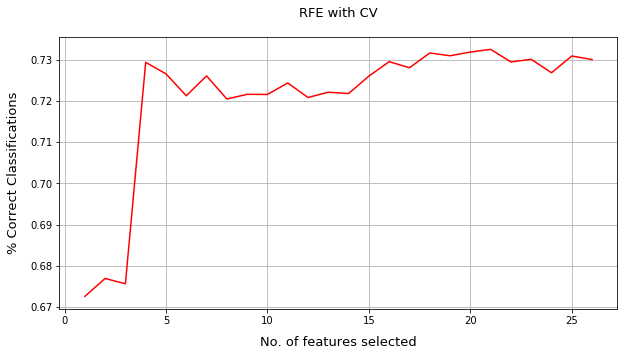

In [103]:
plt.figure(figsize=(10,5))
plt.title("RFE with CV",fontsize=13,pad=20)
plt.xlabel("No. of features selected",fontsize=13,labelpad=10)
plt.ylabel("% Correct Classifications",fontsize=13,labelpad=10)
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_,color="red",linewidth=1.5)
plt.grid(True)
plt.show()

In [104]:
print(np.where(rfecv.support_==False)[0])

[ 6 20 21 22 24]


In [105]:
x.iloc[:,np.where(rfecv.support_==False)[0]].columns

Index(['PAY_5', 'SEX_Male', 'EDUCATION_HighSchool', 'EDUCATION_Others',
       'MARRIAGE_Others'],
      dtype='object')

In [106]:
xtrain1=xtrain.drop(['PAY_3', 'PAY_5', 'SEX_Male', 'EDUCATION_HighSchool',
       'EDUCATION_Others', 'EDUCATION_University', 'MARRIAGE_Others',
       'MARRIAGE_Single'],axis=1)

xtest1=xtest.drop(['PAY_3', 'PAY_5', 'SEX_Male', 'EDUCATION_HighSchool',
       'EDUCATION_Others', 'EDUCATION_University', 'MARRIAGE_Others',
       'MARRIAGE_Single'],axis=1)

In [107]:
model=dt.fit(xtrain1,ytrain)
ypred=model.predict(xtest1)

In [108]:
cm = confusion_matrix(ytest,ypred)
cm

array([[3825,  838],
       [ 791,  546]], dtype=int64)

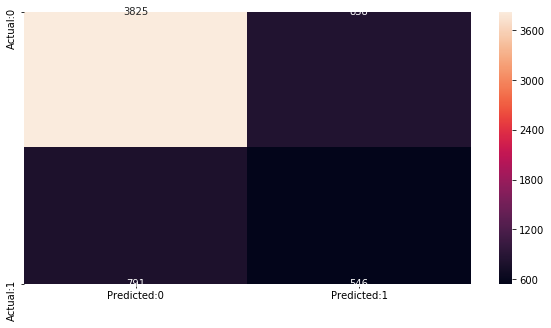

In [109]:
plt.figure(figsize=(10,5))
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='g')
plt.show()

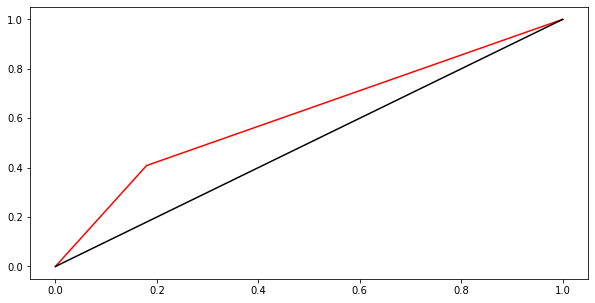

In [110]:
plt.figure(figsize=(10,5))
fpr,tpr,threshold = roc_curve(ytest,ypred)
plt.plot(fpr,tpr,color='red')
plt.plot(fpr,fpr,color='black')
plt.show()

In [111]:
roc_auc_score(ytest,ypred)

0.6143321659987897

In [112]:
print("Cohen's Kappa",cohen_kappa_score(ytest,ypred))
print("Matthew's Correlation",matthews_corrcoef(ytest,ypred))
print(classification_report(ytest,ypred))

Cohen's Kappa 0.22583306508641787
Matthew's Correlation 0.22588942143674914
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4663
           1       0.39      0.41      0.40      1337

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000



In [113]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(dt, xtrain, ytrain, cv=kfolds, scoring='f1_weighted')
print('Bias Error in Decision Tree after RFECV',1-r_scores.mean())
print('Variance Error in Decision Tree after RFECV',r_scores.var())

Bias Error in Decision Tree after RFECV 0.26854213940382166
Variance Error in Decision Tree after RFECV 6.379304362857942e-05


In [114]:
##smote

In [115]:
from imblearn.combine import SMOTETomek

In [116]:
smt=SMOTETomek(random_state=42)
x=df1.drop(["DEFAULT"],axis=1)
y=df1["DEFAULT"]

x_reset,y_reset=smt.fit_sample(x,y)

In [117]:
from collections import Counter
print("Orignal Data Count{}".format(Counter(df1["DEFAULT"])))
print("Revised Data Count{}".format(Counter(y_reset)))

Orignal Data CountCounter({0: 23364, 1: 6636})
Revised Data CountCounter({1: 22730, 0: 22730})


In [118]:
lr=LogisticRegression()

In [119]:
xtrain,xtest,ytrain,ytest=train_test_split(x_reset,y_reset,test_size=0.2,random_state=25)
smotemodel=lr.fit(xtrain,ytrain)
smotepred=smotemodel.predict(xtest)

Cohen's Kappa :  0.1704232557432417
Matthew's Correlation :  0.18483876075608044
              precision    recall  f1-score   support

           0       0.56      0.78      0.65      4553
           1       0.64      0.39      0.49      4539

    accuracy                           0.59      9092
   macro avg       0.60      0.59      0.57      9092
weighted avg       0.60      0.59      0.57      9092

0.5854597448306204


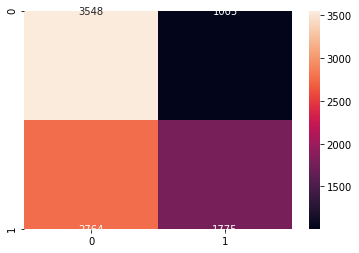

In [120]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,smotepred))
print("Matthew's Correlation : ",matthews_corrcoef(ytest,smotepred))
print(classification_report(ytest,smotepred))
print(accuracy_score(ytest,smotepred))
sns.heatmap(confusion_matrix(ytest,smotepred),annot=True,fmt="g")
plt.show()

In [121]:
rf=RandomForestClassifier()

In [122]:
smotemodel=rf.fit(xtrain,ytrain)
smotepred=smotemodel.predict(xtest)

Cohen's Kappa :  0.7100558365894798
Matthew's Correlation :  0.7106509943171768
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4553
           1       0.87      0.83      0.85      4539

    accuracy                           0.86      9092
   macro avg       0.86      0.86      0.85      9092
weighted avg       0.86      0.86      0.85      9092

0.8550373955125385


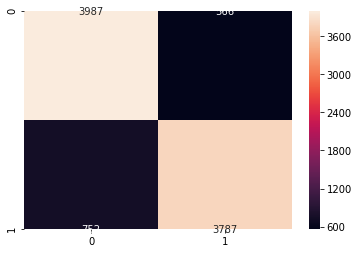

In [123]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,smotepred))
print("Matthew's Correlation : ",matthews_corrcoef(ytest,smotepred))
print(classification_report(ytest,smotepred))
print(accuracy_score(ytest,smotepred))
sns.heatmap(confusion_matrix(ytest,smotepred),annot=True,fmt="g")
plt.show()

In [124]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(lr, xtrain, ytrain, cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in Logitic after SMOTE TOMEK', r_scores.mean())
print('Bias Error in Logistic after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in Logistic after SMOTE TOMEK',r_scores.var())

Mean weighted F1-score in Logitic after SMOTE TOMEK 0.5805256943528969
Bias Error in Logistic after SMOTE TOMEK 0.4194743056471031
Variance Error in Logistic after SMOTE TOMEK 0.0005005927413542031


In [125]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [126]:
smotemodel=nb.fit(xtrain,ytrain)
smotepred=smotemodel.predict(xtest)

Cohen's Kappa :  0.11675829785650438
Matthew's Correlat ion :  0.1844925101169159
              precision    recall  f1-score   support

           0       0.76      0.17      0.28      4553
           1       0.53      0.95      0.68      4539

    accuracy                           0.56      9092
   macro avg       0.65      0.56      0.48      9092
weighted avg       0.65      0.56      0.48      9092

0.557853057633084


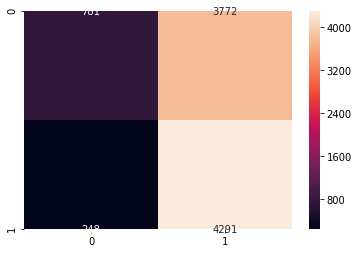

In [127]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,smotepred))
print("Matthew's Correlat ion : ",matthews_corrcoef(ytest,smotepred))
print(classification_report(ytest,smotepred))
print(accuracy_score(ytest,smotepred))
sns.heatmap(confusion_matrix(ytest,smotepred),annot=True,fmt="g")
plt.show()

In [128]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(nb, xtrain, ytrain, cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in NaiveBayes after SMOTE TOMEK', r_scores.mean())
print('Bias Error in NaiveBayes after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in NaiveBayes after SMOTE TOMEK',r_scores.var())

Mean weighted F1-score in NaiveBayes after SMOTE TOMEK 0.4693252783385497
Bias Error in NaiveBayes after SMOTE TOMEK 0.5306747216614502
Variance Error in NaiveBayes after SMOTE TOMEK 9.777049526686916e-05


In [129]:
dt=DecisionTreeClassifier()

In [130]:
smotemodel=dt.fit(xtrain,ytrain)
smotepred=smotemodel.predict(xtest)

Cohen's Kappa :  0.5475305438301264
Matthew's Correlat ion :  0.547699761803876
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      4553
           1       0.77      0.79      0.78      4539

    accuracy                           0.77      9092
   macro avg       0.77      0.77      0.77      9092
weighted avg       0.77      0.77      0.77      9092

0.7737571491421029


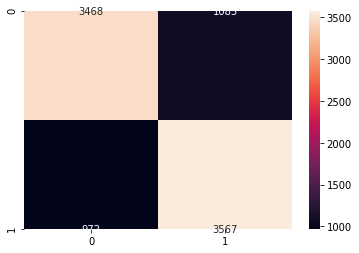

In [131]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,smotepred))
print("Matthew's Correlat ion : ",matthews_corrcoef(ytest,smotepred))
print(classification_report(ytest,smotepred))
print(accuracy_score(ytest,smotepred))
sns.heatmap(confusion_matrix(ytest,smotepred),annot=True,fmt="g")
plt.show()

In [132]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(dt, xtrain, ytrain, cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in DT after SMOTE TOMEK', r_scores.mean())
print('Bias Error in DT after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in DT after SMOTE TOMEK',r_scores.var())

Mean weighted F1-score in DT after SMOTE TOMEK 0.7568094826565532
Bias Error in DT after SMOTE TOMEK 0.24319051734344677
Variance Error in DT after SMOTE TOMEK 5.6251447736833646e-05


In [133]:
ada=AdaBoostClassifier()

In [134]:
smotemodel=ada.fit(xtrain,ytrain)
smotepred=smotemodel.predict(xtest)

Cohen's Kappa :  0.5375830638838748
Matthew's Correlation :  0.5381041490461109
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      4553
           1       0.78      0.75      0.76      4539

    accuracy                           0.77      9092
   macro avg       0.77      0.77      0.77      9092
weighted avg       0.77      0.77      0.77      9092

0.7688077430708316


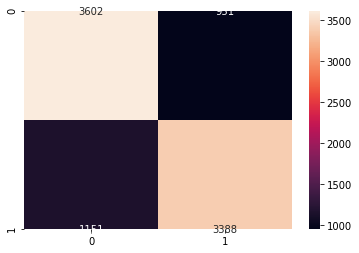

In [135]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,smotepred))
print("Matthew's Correlation : ",matthews_corrcoef(ytest,smotepred))
print(classification_report(ytest,smotepred))
print(accuracy_score(ytest,smotepred))
sns.heatmap(confusion_matrix(ytest,smotepred),annot=True,fmt="g")
plt.show()

In [136]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(ada, xtrain, ytrain, cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in AdaBoost after SMOTE TOMEK', r_scores.mean())
print('Bias Error in AdaBoost after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in AdaBoost after SMOTE TOMEK',r_scores.var())

Mean weighted F1-score in AdaBoost after SMOTE TOMEK 0.7633870265926601
Bias Error in AdaBoost after SMOTE TOMEK 0.2366129734073399
Variance Error in AdaBoost after SMOTE TOMEK 5.8285039444561985e-05


In [137]:
gbm=GradientBoostingClassifier()

In [138]:
smotemodel=gbm.fit(xtrain,ytrain)
smotepred=smotemodel.predict(xtest)

Cohen's Kappa :  0.5837565078031692
Matthew's Correlation :  0.5857213543565916
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      4553
           1       0.82      0.75      0.78      4539

    accuracy                           0.79      9092
   macro avg       0.79      0.79      0.79      9092
weighted avg       0.79      0.79      0.79      9092

0.7919049714034316


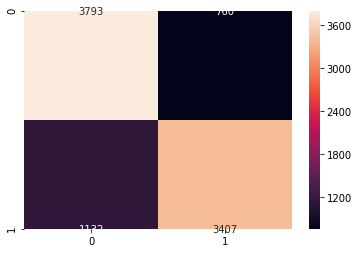

In [139]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,smotepred))
print("Matthew's Correlation : ",matthews_corrcoef(ytest,smotepred))
print(classification_report(ytest,smotepred))
print(accuracy_score(ytest,smotepred))
sns.heatmap(confusion_matrix(ytest,smotepred),annot=True,fmt="g")
plt.show()

In [140]:
kfolds=model_selection.KFold(n_splits=10,random_state=1)
r_scores=cross_val_score(gbm, xtrain, ytrain, cv=kfolds, scoring='f1_weighted')
print('Mean weighted F1-score in GradientBoost after SMOTE TOMEK', r_scores.mean())
print('Bias Error in GradientBoost after SMOTE TOMEK',1-r_scores.mean())
print('Variance Error in GradientBoost after SMOTE TOMEK',r_scores.var())

Mean weighted F1-score in GradientBoost after SMOTE TOMEK 0.7908818272632397
Bias Error in GradientBoost after SMOTE TOMEK 0.20911817273676025
Variance Error in GradientBoost after SMOTE TOMEK 5.345861057229401e-05


In [141]:
### Tuning

In [142]:
x=df1.drop(["DEFAULT"],axis=1)
y=df1["DEFAULT"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [143]:
param_grid = [{'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6],'penalty':['l1','l2']}]

In [144]:
lr=LogisticRegression()

In [145]:
gs = GridSearchCV(lr,param_grid,cv=5,scoring='f1_weighted')
gs.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [146]:
gs.best_params_

{'C': 0.6, 'penalty': 'l2'}

In [147]:
lr_gs = LogisticRegression(**gs.best_params_)

In [148]:
model=lr_gs.fit(xtrain,ytrain)
pred=model.predict(xtest)

Cohen's Kappa :  0.0
Matthew's Correlation :  0.0
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4703
           1       0.00      0.00      0.00      1297

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000

0.7838333333333334


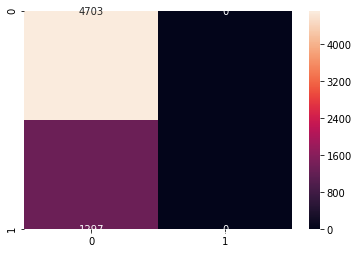

In [149]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,pred))
print("Matthew's Correlation : ",matthews_corrcoef(ytest,pred))
print(classification_report(ytest,pred))
print(accuracy_score(ytest,pred))
sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt="g")
plt.show()

In [153]:
smt=SMOTETomek(random_state=42)
x_reset,y_reset=smt.fit_sample(x,y)
xtrsmote,xtesmote,ytrsmote,ytesmote=train_test_split(x_reset,y_reset,test_size=0.2,random_state=0)

In [154]:
print(gs.best_params_)
print(gs.best_score_)

{'C': 0.6, 'penalty': 'l2'}
0.6806215666811392


In [155]:
print("Cohen's Kappa : ",cohen_kappa_score(ytesmote,pred))
print("Matthew's Correlation : ",matthews_corrcoef(ytesmote,pred))
print(classification_report(ytesmote,pred))
print(accuracy_score(ytesmote,pred))
sns.heatmap(confusion_matrix(ytesmote,pred),annot=True,fmt="g")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [9092, 6000]

In [156]:
from sklearn.tree import DecisionTreeClassifier
#making the instance
dt= DecisionTreeClassifier(random_state=42)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[42]}
#Making models with hyper parameters sets
gs = GridSearchCV(dt, param_grid=params, n_jobs=-1,cv=5,scoring='f1_weighted')
#Learning
gs.fit(xtrain,ytrain)
#The best hyper parameters set
print("Best Hyper Parameters:",gs.best_params_)

Best Hyper Parameters: {'max_features': 'log2', 'min_samples_leaf': 11, 'min_samples_split': 2, 'random_state': 42}


In [157]:
dt_gs=DecisionTreeClassifier(**gs.best_params_)

In [158]:
model=dt_gs.fit(xtrain,ytrain)
pred=model.predict(xtest)

Cohen's Kappa :  0.31048406414038066
Matthew's Correlation :  0.3235359086698211
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4703
           1       0.55      0.34      0.42      1297

    accuracy                           0.80      6000
   macro avg       0.70      0.63      0.65      6000
weighted avg       0.78      0.80      0.78      6000

0.7985


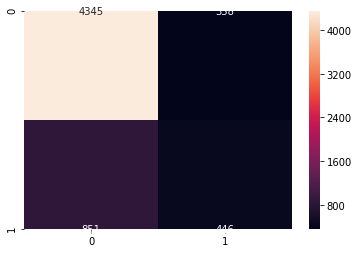

In [159]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,pred))
print("Matthew's Correlation : ",matthews_corrcoef(ytest,pred))
print(classification_report(ytest,pred))
print(accuracy_score(ytest,pred))
sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt="g")
plt.show()

In [160]:
smotemodel=dt_gs.fit(xtrain,ytrain)
smotepred=smotemodel.predict(xtest)

Cohen's Kappa :  0.31048406414038066
Matthew's Correlat ion :  0.3235359086698211
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4703
           1       0.55      0.34      0.42      1297

    accuracy                           0.80      6000
   macro avg       0.70      0.63      0.65      6000
weighted avg       0.78      0.80      0.78      6000

0.7985


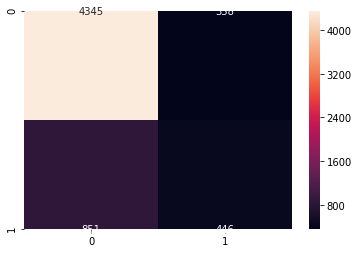

In [161]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,smotepred))
print("Matthew's Correlat ion : ",matthews_corrcoef(ytest,smotepred))
print(classification_report(ytest,smotepred))
print(accuracy_score(ytest,smotepred))
sns.heatmap(confusion_matrix(ytest,smotepred),annot=True,fmt="g")
plt.show()

In [163]:
smt=SMOTETomek(random_state=42)
x_reset,y_reset=smt.fit_sample(x,y)
xtrsmote,xtesmote,ytrsmote,ytesmote=train_test_split(x_reset,y_reset,test_size=0.2,random_state=0)

In [164]:
print(gs.best_params_)
print(gs.best_score_)

{'max_features': 'log2', 'min_samples_leaf': 11, 'min_samples_split': 2, 'random_state': 42}
0.7697003859575114


In [165]:
dt_gs = DecisionTreeClassifier(**gs.best_params_)
model=dt_gs.fit(xtrsmote,ytrsmote)
pred=model.predict(xtesmote)

Cohen's Kappa :  0.49231485284793886
Matthew's Correlation :  0.4924071137426783
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      4539
           1       0.75      0.74      0.74      4553

    accuracy                           0.75      9092
   macro avg       0.75      0.75      0.75      9092
weighted avg       0.75      0.75      0.75      9092

0.7461504619445667


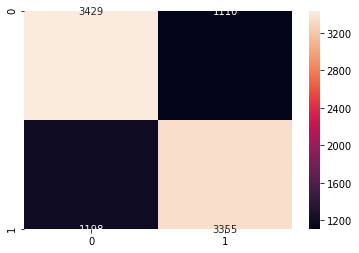

In [166]:
print("Cohen's Kappa : ",cohen_kappa_score(ytesmote,pred))
print("Matthew's Correlation : ",matthews_corrcoef(ytesmote,pred))
print(classification_report(ytesmote,pred))
print(accuracy_score(ytesmote,pred))
sns.heatmap(confusion_matrix(ytesmote,pred),annot=True,fmt="g")
plt.show()

In [167]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='f1_weighted',n_jobs=4,iid=False, cv=5)
gsearch1.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
    

In [168]:
gsearch1.best_params_

{'n_estimators': 70}

In [169]:
gboost_gs = GradientBoostingClassifier(**gsearch1.best_params_)

In [170]:
model=gboost_gs.fit(xtrain,ytrain)
pred=model.predict(xtest)

Cohen's Kappa :  0.39224487895790405
Matthew's Correlation :  0.42009196200918103
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4703
           1       0.70      0.37      0.48      1297

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.83      0.81      6000

0.8288333333333333


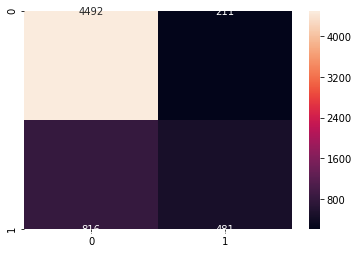

In [171]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,pred))
print("Matthew's Correlation : ",matthews_corrcoef(ytest,pred))
print(classification_report(ytest,pred))
print(accuracy_score(ytest,pred))
sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt="g")
plt.show()

In [172]:
smt=SMOTETomek(random_state=42)
x_reset,y_reset=smt.fit_sample(x,y)
xtrsmote,xtesmote,ytrsmote,ytesmote=train_test_split(x_reset,y_reset,test_size=0.2,random_state=0)

In [55]:
print("Cohen's Kappa : ",cohen_kappa_score(ytesmote,pred))
print("Matthew's Correlation : ",matthews_corrcoef(ytesmote,pred))
print(classification_report(ytesmote,pred))
print(accuracy_score(ytesmote,pred))
sns.heatmap(confusion_matrix(ytesmote,pred),annot=True,fmt="g")
plt.show()

NameError: name 'ytesmote' is not defined

In [174]:
# Feature Engineered models with dropped records

In [5]:
df1=pd.read_csv("credit_card1.csv")

In [6]:
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df1["Total_Risk_Value"]=df1["PAY_1"]+df1["PAY_2"]+df1["PAY_3"]+df1["PAY_4"]+df1["PAY_5"]+df1["PAY_6"]

In [8]:
df1.drop(["PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"],axis=1,inplace=True)

In [9]:
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,Total_Risk_Value
0,1,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2
1,2,120000,2,2,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3
2,3,90000,2,2,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,4,50000,2,2,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,5,50000,1,2,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2


In [10]:
df1.drop(["ID"],axis=1,inplace=True)

In [11]:
df1.SEX=df1.SEX.map({2: 'Female', 1:'Male'})

In [12]:
df1.EDUCATION=df1.EDUCATION.map({1:'GraduateSchool', 2:'University', 3:'HighSchool', 4:'Others', 0:'Others', 5:'Others', 6:'Others'})

In [13]:
df1.MARRIAGE=df1.MARRIAGE.map({1:'Married', 2:'Single', 3:'Others', 0:'Others'})

In [14]:
df1["demographics"]=df1["SEX"].astype("str")+"_"+df1["EDUCATION"]+"_"+df1["MARRIAGE"]

In [15]:
df1.drop(["SEX","EDUCATION","MARRIAGE"],axis=1,inplace=True)

In [16]:
def age_cat(y):
    if y>=20 and y<40:
        return "Young"
    elif y>=40 and y<60:
        return "Middle Aged"
    elif y>=60 and y<80:
        return "Senior Citizens"
df1['Age_Category']=df1.AGE.apply(age_cat)

In [17]:
df1.drop(columns='AGE', inplace=True)

In [18]:
def limit_cat(x):
    if x>=10000 and x<208000:
        return "Low Limit Holder"
    elif x>=208000 and x<406000:
        return "Medium Limit Holder"
    elif x>=406000 and x<604000:
        return "High Limit Holder"
    elif x>=604000 and x<802000:
        return "Very High Limit Holder"
    elif x>=802000 and x<1000000:
        return "Ultra High Limit Holder"
df1['Credit_Limit_Category']=df1.LIMIT_BAL.apply(limit_cat)

In [19]:
df1.drop(columns='LIMIT_BAL', inplace=True)

In [20]:
df1.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,Total_Risk_Value,demographics,Age_Category,Credit_Limit_Category
0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,Female_University_Married,Young,Low Limit Holder
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,Female_University_Single,Young,Low Limit Holder
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,Female_University_Single,Young,Low Limit Holder
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,Female_University_Married,Young,Low Limit Holder
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,Male_University_Married,Middle Aged,Low Limit Holder


In [21]:
df1=pd.get_dummies(df1,drop_first=True)

In [22]:
df1["Avg.Bill"]=(df1["BILL_AMT1"]+df1["BILL_AMT2"]+df1["BILL_AMT3"]+df1["BILL_AMT4"]+df1["BILL_AMT5"]+df1["BILL_AMT6"])/6

In [265]:
df1["Avg.Outstanding"]=((df1["BILL_AMT6"]-df1["PAY_AMT5"])+(df1["BILL_AMT5"]-df1["PAY_AMT4"])+(df1["BILL_AMT4"]-df1["PAY_AMT3"])+(df1["BILL_AMT3"]-df1["PAY_AMT2"])+(df1["BILL_AMT2"]-df1["PAY_AMT1"]))/5

In [23]:
df1["Avg.Pay"]=(df1["PAY_AMT1"]+df1["PAY_AMT2"]+df1["PAY_AMT3"]+df1["PAY_AMT4"]+df1["PAY_AMT5"]+df1["PAY_AMT6"])/6

In [24]:
df1.drop(["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"],axis=1,inplace=True)

In [25]:
df1.drop(["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"],axis=1,inplace=True)

In [26]:
df1.head()

,DEFAULT,Total_Risk_Value,demographics_Female_GraduateSchool_Others,demographics_Female_GraduateSchool_Single,demographics_Female_HighSchool_Married,demographics_Female_HighSchool_Others,demographics_Female_HighSchool_Single,demographics_Female_Others_Married,demographics_Female_Others_Others,demographics_Female_Others_Single,...,demographics_Male_University_Married,demographics_Male_University_Others,demographics_Male_University_Single,Age_Category_Senior Citizens,Age_Category_Young,Credit_Limit_Category_Low Limit Holder,Credit_Limit_Category_Medium Limit Holder,Credit_Limit_Category_Very High Limit Holder,Avg.Bill,Avg.Pay
0,1,-2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1284.000000,114.833333
1,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,2846.166667,833.333333
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,16942.166667,1836.333333
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,38555.666667,1398.000000
4,0,-2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,18223.166667,9841.500000


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x = df1.drop('DEFAULT',axis=1)
y = df1['DEFAULT']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_trainc = sm.add_constant(x_train)
x_testc = sm.add_constant(x_test)

In [29]:
logit_model = sm.Logit(y_train,x_trainc)
result = logit_model.fit()
result.summary()

         Current function value: 0.479660
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20968
Method:                           MLE   Df Model:                           31
Date:                Fri, 31 Jan 2020   Pseudo R-squ.:                 0.09543
Time:                        19:46:00   Log-Likelihood:                -10073.
converged:                      False   LL-Null:                       -11136.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.9514      0.123     -7.761      0.000      -1.192      -0.711
Total_Risk_Value                                 0.1200      0.004     34.044      0.000       0.113       0.127
demographics_Female_GraduateSchool_Others       -0.1406      0.788     -0.178      0.858      -1.685       1.404
demographics_Female_GraduateSchool_Single       -0.2514      0.089     -2.841      0.005      -0.425      -0.078
demographics_Female_HighSchool_Married          -0.2359      0.101     -2.336      0.019      -0.434      -0.038
demographics_Female_HighSchool_Others           -0.5541      0.331     -1.674      0.094      -1.203       0.095
demographics_Female_HighSchool_Single           -0.2123      0.119     -1.777      0.076      -0.446       0.022
demographics_Female_Others_Married              -1.4106      0.431     -3.276      0.001      -2.255      -0.567
demographics_Female_Others_Others              -18.2825   9840.562     -0.002      0.999   -1.93e+04    1.93e+04
demographics_Female_Others_Single               -0.7037      0.332     -2.119      0.034      -1.354      -0.053
demographics_Female_University_Married          -0.1163      0.085     -1.368      0.171      -0.283       0.050
demographics_Female_University_Others           -0.1939      0.295     -0.657      0.511      -0.773       0.385
demographics_Female_University_Single           -0.2545      0.088     -2.896      0.004      -0.427      -0.082
demographics_Male_GraduateSchool_Married         0.1536      0.103      1.495      0.135      -0.048       0.355
demographics_Male_GraduateSchool_Others          0.1252      0.498      0.251      0.802      -0.851       1.102
demographics_Male_GraduateSchool_Single         -0.2236      0.097     -2.313      0.021      -0.413      -0.034
demographics_Male_HighSchool_Married             0.0985      0.113      0.868      0.385      -0.124       0.321
demographics_Male_HighSchool_Others             -0.4671      0.446     -1.048      0.295      -1.340       0.406
demographics_Male_HighSchool_Single             -0.1648      0.122     -1.351      0.177      -0.404       0.074
demographics_Male_Others_Married                -0.7574      0.441     -1.716      0.086      -1.623       0.108
demographics_Male_Others_Others                -17.9896   8607.881     -0.002      0.998   -1.69e+04    1.69e+04
demographics_Male_Others_Single                 -1.6336      0.602     -2.715      0.007      -2.813      -0.454
demographics_Male_University_Married             0.0492      0.093      0.530      0.596      -0.133       0.231
demographics_Male_University_Others              0.0373      0.326      0.115      0.909      -0.601       0.676
demographics_Male_University_Single             -0.2017      0.092     -2.204      0.028      -0.381      -0.022
Age_Category_Senior Citizens                     0.2582      0.156      1.650

In [30]:
y_prob = result.predict(x_testc)
y_prob.head()

2308     0.246599
22404    0.195565
23397    0.213676
25058    0.232425
2664     0.274708
dtype: float64

In [31]:
y_test_data = pd.DataFrame(y_test)
y_test_data['prob'] = y_prob

In [32]:
y_test_data['y_pred'] = y_test_data['prob'].apply(lambda x:1 if x>=0.5 else 0)
y_test_data.head()

,DEFAULT,prob,y_pred
2308,0,0.246599,0
22404,0,0.195565,0
23397,0,0.213676,0
25058,0,0.232425,0
2664,1,0.274708,0


In [33]:
cm = confusion_matrix(y_test_data['DEFAULT'],y_test_data['y_pred'])
cm

array([[6866,  174],
       [1655,  305]], dtype=int64)

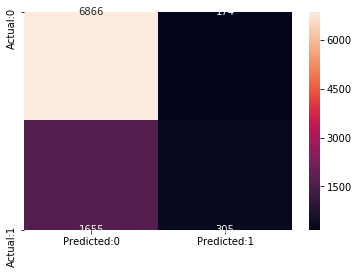

In [34]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='g')

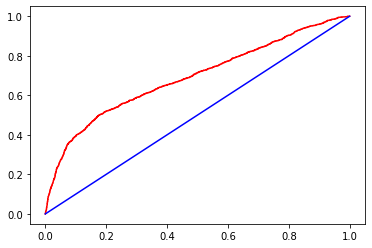

In [35]:
fpr,tpr,threshold = roc_curve(y_test_data['DEFAULT'],y_test_data['prob'])
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')
plt.show()

In [36]:
roc_auc_score(y_test_data['DEFAULT'],y_test_data['prob'])

0.6900878000347866

In [37]:
from sklearn.metrics import cohen_kappa_score,roc_auc_score,classification_report,matthews_corrcoef,confusion_matrix

In [38]:
print("Cohen's Kappa",cohen_kappa_score(y_test_data['DEFAULT'],y_test_data['y_pred']))
print("Matthew's Correlation",matthews_corrcoef(y_test_data['DEFAULT'],y_test_data['y_pred']))
print(classification_report(y_test_data['DEFAULT'],y_test_data['y_pred']))
print(accuracy_score(y_test_data['DEFAULT'],y_test_data['y_pred']))

Cohen's Kappa 0.17995628027650623
Matthew's Correlation 0.24067380014718884
              precision    recall  f1-score   support

           0       0.81      0.98      0.88      7040
           1       0.64      0.16      0.25      1960

    accuracy                           0.80      9000
   macro avg       0.72      0.57      0.57      9000
weighted avg       0.77      0.80      0.74      9000

0.7967777777777778


In [39]:
df1['Total_Risk_Value'].median()

0.0

In [42]:
#df1['Avg.Outstanding'].median()

In [43]:
fil = ((df1["Total_Risk_Value"] <0) &(df1["DEFAULT"] ==1))

In [44]:
df1.loc[fil,:].head()

,DEFAULT,Total_Risk_Value,demographics_Female_GraduateSchool_Others,demographics_Female_GraduateSchool_Single,demographics_Female_HighSchool_Married,demographics_Female_HighSchool_Others,demographics_Female_HighSchool_Single,demographics_Female_Others_Married,demographics_Female_Others_Others,demographics_Female_Others_Single,...,demographics_Male_University_Married,demographics_Male_University_Others,demographics_Male_University_Single,Age_Category_Senior Citizens,Age_Category_Young,Credit_Limit_Category_Low Limit Holder,Credit_Limit_Category_Medium Limit Holder,Credit_Limit_Category_Very High Limit Holder,Avg.Bill,Avg.Pay
0,1,-2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1284.000000,114.833333
21,1,-6,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,316.000000,263.333333
23,1,-12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4494.166667,3764.833333
26,1,-5,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,-65.666667,416.666667
38,1,-7,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,130.000000,130.000000


In [45]:
index=df1.loc[fil].index
df1.drop(index,inplace=True)

In [46]:
df1.shape

(27971, 32)

In [47]:
x = df1.drop('DEFAULT',axis=1)
y = df1['DEFAULT']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_trainc = sm.add_constant(x_train)
x_testc = sm.add_constant(x_test)

In [48]:
logit_model = sm.Logit(y_train,x_trainc)
result = logit_model.fit()
result.summary()

         Current function value: 0.317961
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                22376
Model:                          Logit   Df Residuals:                    22344
Method:                           MLE   Df Model:                           31
Date:                Fri, 31 Jan 2020   Pseudo R-squ.:                  0.2914
Time:                        19:47:20   Log-Likelihood:                -7114.7
converged:                      False   LL-Null:                       -10041.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.8302      0.188    -15.057      0.000      -3.199      -2.462
Total_Risk_Value                                 0.2671      0.005     51.925      0.000       0.257       0.277
demographics_Female_GraduateSchool_Others        0.8020      0.807      0.994      0.320      -0.780       2.384
demographics_Female_GraduateSchool_Single       -0.0089      0.130     -0.069      0.945      -0.264       0.246
demographics_Female_HighSchool_Married           0.2229      0.138      1.610      0.107      -0.048       0.494
demographics_Female_HighSchool_Others            0.0309      0.395      0.078      0.938      -0.743       0.805
demographics_Female_HighSchool_Single            0.1354      0.158      0.856      0.392      -0.175       0.445
demographics_Female_Others_Married              -1.3903      0.627     -2.219      0.027      -2.618      -0.162
demographics_Female_Others_Others              -15.1509   4336.825     -0.003      0.997   -8515.171    8484.869
demographics_Female_Others_Single               -0.4610      0.441     -1.045      0.296      -1.326       0.404
demographics_Female_University_Married           0.1839      0.123      1.491      0.136      -0.058       0.426
demographics_Female_University_Others           -0.1680      0.393     -0.428      0.669      -0.937       0.601
demographics_Female_University_Single            0.0378      0.126      0.300      0.764      -0.209       0.284
demographics_Male_GraduateSchool_Married         0.1122      0.153      0.734      0.463      -0.187       0.412
demographics_Male_GraduateSchool_Others          1.2291      0.513      2.396      0.017       0.224       2.234
demographics_Male_GraduateSchool_Single         -0.0336      0.137     -0.244      0.807      -0.303       0.236
demographics_Male_HighSchool_Married             0.2675      0.154      1.734      0.083      -0.035       0.570
demographics_Male_HighSchool_Others              0.5640      0.462      1.221      0.222      -0.341       1.469
demographics_Male_HighSchool_Single              0.1704      0.158      1.079      0.281      -0.139       0.480
demographics_Male_Others_Married                 0.3615      0.431      0.838      0.402      -0.484       1.207
demographics_Male_Others_Others                 -4.1668     51.202     -0.081      0.935    -104.520      96.186
demographics_Male_Others_Single                 -1.8602      0.841     -2.211      0.027      -3.509      -0.211
demographics_Male_University_Married             0.3687      0.131      2.810      0.005       0.112       0.626
demographics_Male_University_Others              0.6439      0.390      1.652      0.099      -0.120       1.408
demographics_Male_University_Single              0.1844      0.128      1.442      0.149      -0.066       0.435
Age_Category_Senior Citizens                    -0.2733      0.211     -1.298

In [49]:
y_prob = result.predict(x_testc)
y_prob.head()

15158    0.084217
27905    0.037392
19704    0.049048
16038    0.063730
17383    0.132428
dtype: float64

In [50]:
y_test_data = pd.DataFrame(y_test)
y_test_data['prob'] = y_prob

In [51]:
y_test_data['y_pred'] = y_test_data['prob'].apply(lambda x:1 if x>=0.2 else 0)
y_test_data.head()

,DEFAULT,prob,y_pred
15158,0,0.084217,0
27905,0,0.037392,0
19704,0,0.049048,0
16038,0,0.063730,0
17383,0,0.132428,0


In [52]:
cm = confusion_matrix(y_test_data['DEFAULT'],y_test_data['y_pred'])
cm

array([[4091,  601],
       [ 310,  593]], dtype=int64)

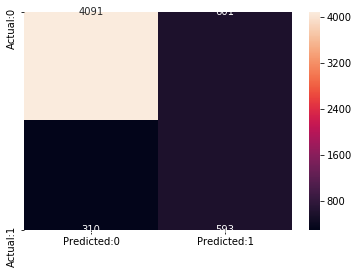

In [53]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='g')

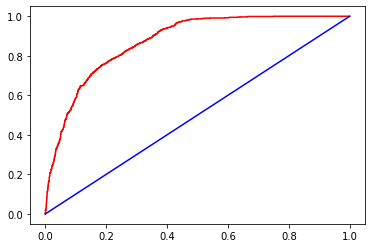

In [54]:
fpr,tpr,threshold = roc_curve(y_test_data['DEFAULT'],y_test_data['prob'])
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')
plt.show()

In [55]:
roc_auc_score(y_test_data['DEFAULT'],y_test_data['prob'])

0.8728402719362096

In [56]:
print("Cohen's Kappa",cohen_kappa_score(y_test_data['DEFAULT'],y_test_data['y_pred']))
print("Matthew's Correlation",matthews_corrcoef(y_test_data['DEFAULT'],y_test_data['y_pred']))
print(classification_report(y_test_data['DEFAULT'],y_test_data['y_pred']))
print(accuracy_score(y_test_data['DEFAULT'],y_test_data['y_pred']))

Cohen's Kappa 0.4677466396125205
Matthew's Correlation 0.4746571329961929
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      4692
           1       0.50      0.66      0.57       903

    accuracy                           0.84      5595
   macro avg       0.71      0.76      0.73      5595
weighted avg       0.86      0.84      0.85      5595

0.8371760500446828


In [57]:
x=df1.drop(["DEFAULT"],axis=1)
y=df1["DEFAULT"]

In [58]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [59]:
modelrf=rf.fit(xtrain,ytrain)
ypred=modelrf.predict(xtest)

NameError: name 'rf' is not defined

In [60]:
confusion_matrix(ytest,ypred)

NameError: name 'ypred' is not defined

In [303]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7050
           1       0.58      0.40      0.48       962

    accuracy                           0.89      8012
   macro avg       0.75      0.68      0.71      8012
weighted avg       0.88      0.89      0.89      8012



In [304]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight={1:70,0:30})

In [305]:
modellr=lr.fit(xtrain,ytrain)
ypredlr=modellr.predict(xtest)

In [306]:
confusion_matrix(ytest,ypredlr)

array([[6216,  834],
       [ 349,  613]], dtype=int64)

In [307]:
print(classification_report(ytest,ypredlr))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7050
           1       0.42      0.64      0.51       962

    accuracy                           0.85      8012
   macro avg       0.69      0.76      0.71      8012
weighted avg       0.88      0.85      0.86      8012



In [308]:
cohen_kappa_score(ytest,ypredlr)

0.42615094376177587

In [309]:
accuracy_score(ytest,ypredlr)

0.8523464802795806

In [310]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [311]:
modelnb=nb.fit(xtrain,ytrain)
yprednb=modelnb.predict(xtest)

In [312]:
print(classification_report(ytest,yprednb))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7050
           1       0.40      0.36      0.38       962

    accuracy                           0.86      8012
   macro avg       0.66      0.64      0.65      8012
weighted avg       0.85      0.86      0.86      8012



In [313]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [314]:
modeldt=dtree.fit(xtrain,ytrain)
ypreddt=modeldt.predict(xtest)

In [315]:
print(classification_report(ytest,ypreddt))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7050
           1       0.41      0.44      0.43       962

    accuracy                           0.86      8012
   macro avg       0.67      0.68      0.67      8012
weighted avg       0.86      0.86      0.86      8012



In [316]:
#smote

In [52]:
from imblearn.combine import SMOTETomek

In [53]:
smt=SMOTETomek(random_state=42,)
x=df1.drop(["DEFAULT"],axis=1)
y=df1["DEFAULT"]

x_reset,y_reset=smt.fit_sample(x,y)

In [54]:
from collections import Counter
print("Orignal Data Count{}".format(Counter(df1["DEFAULT"])))
print("Revised Data Count{}".format(Counter(y_reset)))

Orignal Data CountCounter({0: 23364, 1: 4607})
Revised Data CountCounter({1: 21092, 0: 21092})


In [55]:
lr=LogisticRegression()

In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(x_reset,y_reset,test_size=0.2,random_state=25)
smotemodel=lr.fit(xtrain,ytrain)
smotepred=smotemodel.predict(xtest)

Cohen's Kappa :  0.6690914270671229
Matthew's Correlation :  0.6700880384024451
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      4215
           1       0.85      0.81      0.83      4222

    accuracy                           0.83      8437
   macro avg       0.84      0.83      0.83      8437
weighted avg       0.84      0.83      0.83      8437

0.8345383430129193


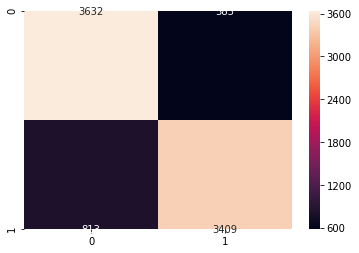

In [59]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,smotepred))
print("Matthew's Correlation : ",matthews_corrcoef(ytest,smotepred))
print(classification_report(ytest,smotepred))
print(accuracy_score(ytest,smotepred))
sns.heatmap(confusion_matrix(ytest,smotepred),annot=True,fmt="g")
plt.show()

In [60]:
rf=RandomForestClassifier()

In [61]:
smotemodel=rf.fit(xtrain,ytrain)
smotepred=smotemodel.predict(xtest)

[[4414  280]
 [ 555  346]]


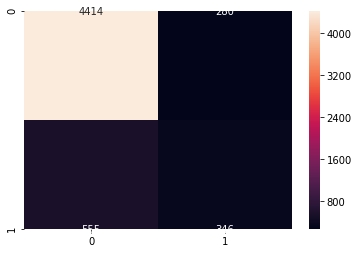

In [119]:
#print("Cohen's Kappa : ",cohen_kappa_score(ytest,smotepred))
#print("Matthew's Correlation : ",matthews_corrcoef(ytest,smotepred))
#print(classification_report(ytest,smotepred))
#print(accuracy_score(ytest,smotepred))
sns.heatmap(confusion_matrix(ytest,smotepred),annot=True,fmt="g")
print(confusion_matrix(ytest,smotepred))

In [63]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [64]:
smotemodel=nb.fit(xtrain,ytrain)
smotepred=smotemodel.predict(xtest)

Cohen's Kappa :  0.49512793963045043
Matthew's Correlat ion :  0.5555868578058599
              precision    recall  f1-score   support

           0       0.95      0.52      0.67      4215
           1       0.67      0.97      0.79      4222

    accuracy                           0.75      8437
   macro avg       0.81      0.75      0.73      8437
weighted avg       0.81      0.75      0.73      8437

0.7476591205404765


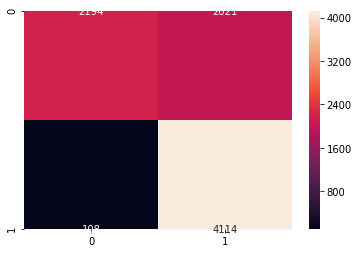

In [65]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,smotepred))
print("Matthew's Correlat ion : ",matthews_corrcoef(ytest,smotepred))
print(classification_report(ytest,smotepred))
print(accuracy_score(ytest,smotepred))
sns.heatmap(confusion_matrix(ytest,smotepred),annot=True,fmt="g")
plt.show()

In [66]:
dt=DecisionTreeClassifier()

In [67]:
smotemodel=dt.fit(xtrain,ytrain)
smotepred=smotemodel.predict(xtest)

Cohen's Kappa :  0.7662658148607937
Matthew's Correlat ion :  0.7662937190122205
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4215
           1       0.88      0.89      0.88      4222

    accuracy                           0.88      8437
   macro avg       0.88      0.88      0.88      8437
weighted avg       0.88      0.88      0.88      8437

0.8831338153372051


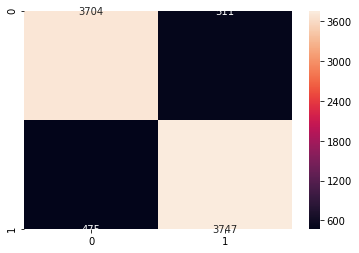

In [68]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,smotepred))
print("Matthew's Correlat ion : ",matthews_corrcoef(ytest,smotepred))
print(classification_report(ytest,smotepred))
print(accuracy_score(ytest,smotepred))
sns.heatmap(confusion_matrix(ytest,smotepred),annot=True,fmt="g")
plt.show()

In [69]:
ada=AdaBoostClassifier()

In [70]:
smotemodel=ada.fit(xtrain,ytrain)
smotepred=smotemodel.predict(xtest)

Cohen's Kappa :  0.8003955475555911
Matthew's Correlation :  0.8011747506279551
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      4215
           1       0.88      0.92      0.90      4222

    accuracy                           0.90      8437
   macro avg       0.90      0.90      0.90      8437
weighted avg       0.90      0.90      0.90      8437

0.9002014934218324


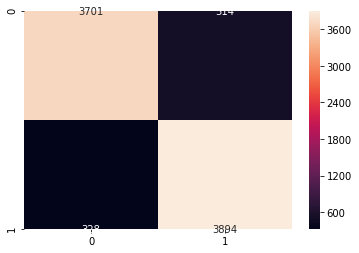

In [71]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,smotepred))
print("Matthew's Correlation : ",matthews_corrcoef(ytest,smotepred))
print(classification_report(ytest,smotepred))
print(accuracy_score(ytest,smotepred))
sns.heatmap(confusion_matrix(ytest,smotepred),annot=True,fmt="g")
plt.show()

In [72]:
gbm=GradientBoostingClassifier()

In [73]:
smotemodel=gbm.fit(xtrain,ytrain)
smotepred=smotemodel.predict(xtest)

Cohen's Kappa :  0.7892494618557748
Matthew's Correlation :  0.7911083190729301
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      4215
           1       0.87      0.93      0.90      4222

    accuracy                           0.89      8437
   macro avg       0.90      0.89      0.89      8437
weighted avg       0.90      0.89      0.89      8437

0.8946307929358777


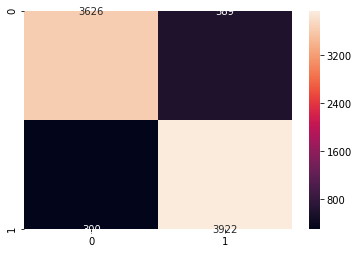

In [74]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,smotepred))
print("Matthew's Correlation : ",matthews_corrcoef(ytest,smotepred))
print(classification_report(ytest,smotepred))
print(accuracy_score(ytest,smotepred))
sns.heatmap(confusion_matrix(ytest,smotepred),annot=True,fmt="g")
plt.show()

In [75]:
### Tuning

In [76]:
x=df1.drop(["DEFAULT"],axis=1)
y=df1["DEFAULT"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [77]:
param_grid = [{'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6],'penalty':['l1','l2']}]

In [78]:
lr=LogisticRegression()

In [79]:
gs = GridSearchCV(lr,param_grid,cv=5,scoring='f1_weighted')
gs.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [80]:
gs.best_params_

{'C': 0.2, 'penalty': 'l2'}

In [81]:
lr_gs = LogisticRegression(**gs.best_params_)

In [82]:
model=lr_gs.fit(xtrain,ytrain)
pred=model.predict(xtest)

Cohen's Kappa :  0.4689817536625812
Matthew's Correlation :  0.469076654226204
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      4694
           1       0.56      0.54      0.55       901

    accuracy                           0.86      5595
   macro avg       0.74      0.73      0.73      5595
weighted avg       0.86      0.86      0.86      5595

0.8584450402144772


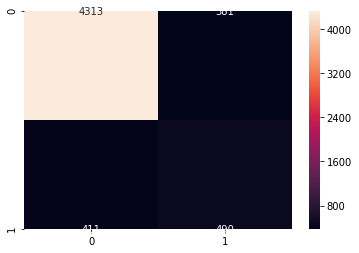

In [83]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,pred))
print("Matthew's Correlation : ",matthews_corrcoef(ytest,pred))
print(classification_report(ytest,pred))
print(accuracy_score(ytest,pred))
sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt="g")
plt.show()

In [84]:
smt=SMOTETomek(random_state=42)
x_reset,y_reset=smt.fit_sample(x,y)
xtrsmote,xtesmote,ytrsmote,ytesmote=train_test_split(x_reset,y_reset,test_size=0.2,random_state=0)

In [85]:
print(gs.best_params_)
print(gs.best_score_)

{'C': 0.2, 'penalty': 'l2'}
0.8505122461284363


In [86]:
lr_gs = LogisticRegression(**gs.best_params_)
model=lr_gs.fit(xtrsmote,ytrsmote)
pred=model.predict(xtesmote)

Cohen's Kappa :  0.6635906588820364
Matthew's Correlation :  0.664944205811055
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      4225
           1       0.85      0.80      0.83      4212

    accuracy                           0.83      8437
   macro avg       0.83      0.83      0.83      8437
weighted avg       0.83      0.83      0.83      8437

0.8318122555410691


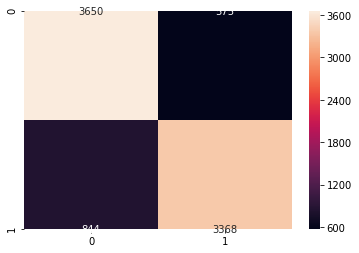

In [87]:
print("Cohen's Kappa : ",cohen_kappa_score(ytesmote,pred))
print("Matthew's Correlation : ",matthews_corrcoef(ytesmote,pred))
print(classification_report(ytesmote,pred))
print(accuracy_score(ytesmote,pred))
sns.heatmap(confusion_matrix(ytesmote,pred),annot=True,fmt="g")
plt.show()

In [88]:
from sklearn.tree import DecisionTreeClassifier
#making the instance
dt= DecisionTreeClassifier(random_state=42)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[42]}
#Making models with hyper parameters sets
gs = GridSearchCV(dt, param_grid=params, n_jobs=-1,cv=5,scoring='f1_weighted')
#Learning
gs.fit(xtrain,ytrain)
#The best hyper parameters set
print("Best Hyper Parameters:",gs.best_params_)

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 13, 'random_state': 42}


In [89]:
dt_gs=DecisionTreeClassifier(**gs.best_params_)

In [90]:
model=dt_gs.fit(xtrain,ytrain)
pred=model.predict(xtest)

Cohen's Kappa :  0.3699930132952367
Matthew's Correlation :  0.3782240363481513
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4694
           1       0.55      0.38      0.45       901

    accuracy                           0.85      5595
   macro avg       0.72      0.66      0.68      5595
weighted avg       0.83      0.85      0.84      5595

0.8507596067917784


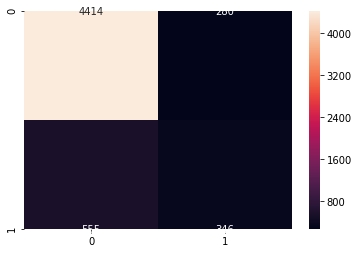

In [91]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,pred))
print("Matthew's Correlation : ",matthews_corrcoef(ytest,pred))
print(classification_report(ytest,pred))
print(accuracy_score(ytest,pred))
sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt="g")
plt.show()

In [92]:
smotemodel=dt_gs.fit(xtrain,ytrain)
smotepred=smotemodel.predict(xtest)

Cohen's Kappa :  0.3699930132952367
Matthew's Correlat ion :  0.3782240363481513
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4694
           1       0.55      0.38      0.45       901

    accuracy                           0.85      5595
   macro avg       0.72      0.66      0.68      5595
weighted avg       0.83      0.85      0.84      5595

0.8507596067917784


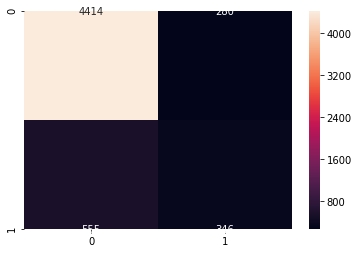

In [93]:
print("Cohen's Kappa : ",cohen_kappa_score(ytest,smotepred))
print("Matthew's Correlat ion : ",matthews_corrcoef(ytest,smotepred))
print(classification_report(ytest,smotepred))
print(accuracy_score(ytest,smotepred))
sns.heatmap(confusion_matrix(ytest,smotepred),annot=True,fmt="g")
plt.show()

In [94]:
smt=SMOTETomek(random_state=42)
x_reset,y_reset=smt.fit_sample(x,y)
xtrsmote,xtesmote,ytrsmote,ytesmote=train_test_split(x_reset,y_reset,test_size=0.2,random_state=0)

In [95]:
print(gs.best_params_)
print(gs.best_score_)

{'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 13, 'random_state': 42}
0.838981697671031


In [96]:
dt_gs = DecisionTreeClassifier(**gs.best_params_)
model=dt_gs.fit(xtrsmote,ytrsmote)
pred=model.predict(xtesmote)

Cohen's Kappa :  0.7306920161424652
Matthew's Correlation :  0.7313288688333751
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4225
           1       0.88      0.84      0.86      4212

    accuracy                           0.87      8437
   macro avg       0.87      0.87      0.87      8437
weighted avg       0.87      0.87      0.87      8437

0.8653549839990518


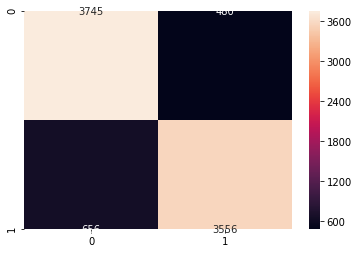

In [97]:
print("Cohen's Kappa : ",cohen_kappa_score(ytesmote,pred))
print("Matthew's Correlation : ",matthews_corrcoef(ytesmote,pred))
print(classification_report(ytesmote,pred))
print(accuracy_score(ytesmote,pred))
sns.heatmap(confusion_matrix(ytesmote,pred),annot=True,fmt="g")
plt.show()

In [100]:
RF=RandomForestClassifier(random_state=0)
kfolds = StratifiedKFold(n_splits=10, random_state=0)
estimators=range(20,101,10)
rsearch= RandomizedSearchCV(cv=kfolds,estimator=RF,scoring = "f1_weighted", param_distributions=dict(n_estimators=estimators, criterion=['gini', 'entropy']))             
rsearch.fit(xtrsmote, ytrsmote)
print(rsearch)
print(rsearch.best_params_)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_spli...
                     

In [101]:
rf_gs = RandomForestClassifier(**rsearch.best_params_)
model_rf=rf_gs.fit(xtrsmote,ytrsmote)
pred=model_rf.predict(xtesmote)

In [102]:
# Random Forest Feature Importance

In [103]:
rf_gs.feature_importances_

array([3.74122447e-01, 1.63095295e-04, 2.53765284e-02, 1.67694411e-02,
       2.32215199e-03, 1.19128514e-02, 2.76723243e-03, 8.20172520e-05,
       2.05804080e-03, 2.51266901e-02, 1.73729683e-03, 2.43716750e-02,
       1.28871453e-02, 9.51527772e-04, 1.89642962e-02, 1.23650933e-02,
       1.38836527e-03, 1.09520993e-02, 8.27554077e-04, 1.73734468e-04,
       1.73882119e-03, 1.73016186e-02, 1.24168697e-03, 2.04133922e-02,
       2.17599809e-03, 1.38342096e-02, 9.44636898e-03, 3.17304507e-02,
       4.71993513e-04, 1.90695156e-01, 1.65631021e-01])

In [104]:
feature_results = pd.DataFrame({'feature': list(xtrsmote.columns),'importance': rf_gs.feature_importances_})  

In [105]:
feature_results = feature_results.sort_values('importance', ascending = False).head(10)

<Figure size 576x432 with 0 Axes>

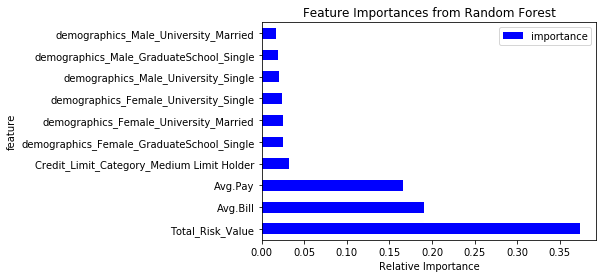

In [106]:
plt.figure(figsize=(8,6))
feature_results.loc[:, :].plot(x = 'feature', y = 'importance', kind='barh', color = 'blue')
plt.xlabel('Relative Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

Cohen's Kappa :  0.807990830721175
Matthew's Correlation :  0.8080236133638351
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4225
           1       0.90      0.91      0.90      4212

    accuracy                           0.90      8437
   macro avg       0.90      0.90      0.90      8437
weighted avg       0.90      0.90      0.90      8437

0.9039943107739717


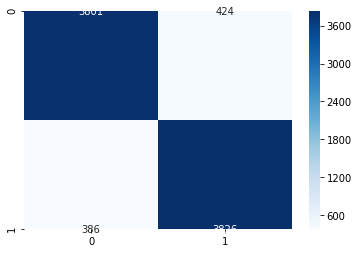

AUC SCORE:  0.9040010227189715


In [112]:
print("Cohen's Kappa : ",cohen_kappa_score(ytesmote,pred))
print("Matthew's Correlation : ",matthews_corrcoef(ytesmote,pred))
print(classification_report(ytesmote,pred))
print(accuracy_score(ytesmote,pred))
sns.heatmap(confusion_matrix(ytesmote,pred),annot=True,fmt="g", cmap='Blues' )
plt.show()
print('AUC SCORE: ', roc_auc_score(ytesmote,pred))

In [371]:
GB=GradientBoostingClassifier(random_state=0)
kfolds = StratifiedKFold(n_splits=10, random_state=0)
estimators=range(20,101,10)
rsearch= RandomizedSearchCV(cv=kfolds,estimator=GB,scoring = "f1_weighted", param_distributions=dict(n_estimators=estimators))             
rsearch.fit(xtrsmote, ytrsmote)
print(rsearch)
print(rsearch.best_params_)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=False),
                   error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                    

In [372]:
gb_gs = GradientBoostingClassifier(**rsearch.best_params_)
model_gb=gb_gs.fit(xtrsmote,ytrsmote)
pred=model_gb.predict(xtesmote)

In [373]:
# Feature Importance from Gradient Boosting

In [374]:
gb_gs.feature_importances_
feature_results = pd.DataFrame({'feature': list(xtrsmote.columns),'importance': gb_gs.feature_importances_})                         
#Showing the top 10 most important features
feature_results = feature_results.sort_values('importance', ascending = False).head(10)

Text(0.5, 1.0, 'Feature Importances from Gradient Boosting')

<Figure size 576x432 with 0 Axes>

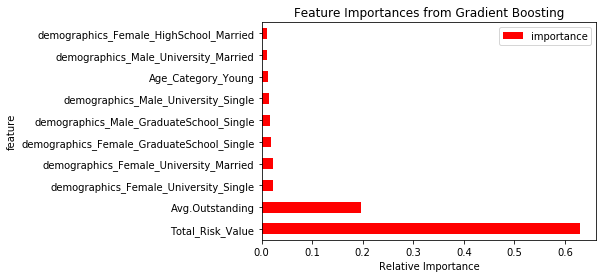

In [375]:
plt.figure(figsize=(8,6))
feature_results.loc[:, :].plot(x = 'feature', y = 'importance', kind='barh', color = 'red')
plt.xlabel('Relative Importance')
plt.title('Feature Importances from Gradient Boosting')

Cohen's Kappa :  0.8220766499666323
Matthew's Correlation :  0.8243189031900421
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      4454
           1       0.88      0.95      0.91      4534

    accuracy                           0.91      8988
   macro avg       0.91      0.91      0.91      8988
weighted avg       0.91      0.91      0.91      8988

0.9111036938139742


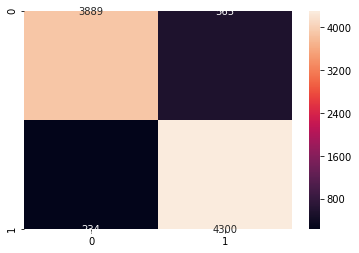

AUC Score:  0.9107688375154424


In [377]:
print("Cohen's Kappa : ",cohen_kappa_score(ytesmote,pred))
print("Matthew's Correlation : ",matthews_corrcoef(ytesmote,pred))
print(classification_report(ytesmote,pred))
print(accuracy_score(ytesmote,pred))
sns.heatmap(confusion_matrix(ytesmote,pred),annot=True,fmt="g")
plt.show()
print('AUC Score: ',roc_auc_score(ytesmote, pred))

In [378]:
RF_boost=AdaBoostClassifier(random_state=0)
kfolds = StratifiedKFold(n_splits=10, random_state=0)
estimators=range(20,101,10)
rsearch= RandomizedSearchCV(cv=kfolds,estimator=RF_boost,scoring = "f1_weighted", param_distributions=dict(n_estimators=estimators))             
rsearch.fit(xtrsmote, ytrsmote)
print(rsearch)
print(rsearch.best_params_)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=False),
                   error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=0),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_estimators': range(20, 101, 10)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1_weighted', verbose=0)
{'n_estimators': 100}


In [379]:
rf_boost_gs = AdaBoostClassifier(**rsearch.best_params_)
model_rf_boost=rf_boost_gs.fit(xtrsmote,ytrsmote)
pred=model_rf_boost.predict(xtesmote)

Cohen's Kappa :  0.8330665105021744
Matthew's Correlation :  0.8332489052864954
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      4454
           1       0.91      0.93      0.92      4534

    accuracy                           0.92      8988
   macro avg       0.92      0.92      0.92      8988
weighted avg       0.92      0.92      0.92      8988

0.9165554072096128


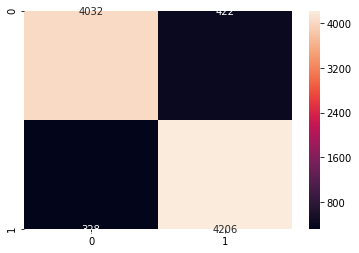

AUC score:  0.9164557009663454


In [380]:
print("Cohen's Kappa : ",cohen_kappa_score(ytesmote,pred))
print("Matthew's Correlation : ",matthews_corrcoef(ytesmote,pred))
print(classification_report(ytesmote,pred))
print(accuracy_score(ytesmote,pred))
sns.heatmap(confusion_matrix(ytesmote,pred),annot=True,fmt="g")
plt.show()
print('AUC score: ',roc_auc_score(ytesmote, pred))

In [381]:
import warnings
warnings.filterwarnings('ignore')
RF=RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)
RF_boost=AdaBoostClassifier(base_estimator=RF, n_estimators=90, random_state=0)
GBoost=GradientBoostingClassifier(n_estimators=100, random_state=0)

In [382]:
models=[]
models.append(('RandomForest', RF))
models.append(('RF_boost', RF_boost))
models.append(('GBoost', GBoost))

In [383]:
results=[]
names=[]
for name, model in models:
    skfold=StratifiedKFold(n_splits=10, random_state=0)
    cv_results=model_selection.cross_val_score(model, xtrsmote, ytrsmote, cv=skfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print('Mean weighted training f1-score')
    print(name, np.mean(cv_results))

Mean weighted training f1-score
RandomForest 0.9253625091433044
Mean weighted training f1-score
RF_boost 0.9261404393997594
Mean weighted training f1-score
GBoost 0.9104407063256208


In [384]:
results=[]
names=[]
for name, model in models:
    skfold=StratifiedKFold(n_splits=10, random_state=0)
    cv_results=model_selection.cross_val_score(model, xtesmote, ytesmote, cv=skfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print('Mean weighted testing f1-score')
    print(name, np.mean(cv_results))

Mean weighted testing f1-score
RandomForest 0.9097351312294316
Mean weighted testing f1-score
RF_boost 0.9087418790197146
Mean weighted testing f1-score
GBoost 0.9119439500993296


In [385]:
###PCA

In [386]:
df1=pd.read_csv("credit_card1.csv")

In [387]:
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [388]:
df1.drop(["ID"],axis=1,inplace=True)

In [389]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [390]:
df1.SEX=df1.SEX.map({2: 'Female', 1:'Male'})

In [391]:
df1.EDUCATION=df1.EDUCATION.map({1:'GraduateSchool', 2:'University', 3:'HighSchool', 4:'Others', 0:'Others', 5:'Others', 6:'Others'})

In [392]:
df1.MARRIAGE=df1.MARRIAGE.map({1:'Married', 2:'Single', 3:'Others', 0:'Others'})

In [393]:
df1=pd.get_dummies(df1,drop_first=True)

In [394]:
df2=df1.copy()

In [395]:
x=df2.drop(["DEFAULT"],axis=1)
y=df2["DEFAULT"]

In [396]:
scaled_df1=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [397]:
scaled_df1.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_Male,EDUCATION_HighSchool,EDUCATION_Others,EDUCATION_University,MARRIAGE_Others,MARRIAGE_Single
0,-1.136720,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,...,-0.296801,-0.308063,-0.314136,-0.293382,-0.810161,-0.442752,-0.125886,1.0669,-0.112812,-1.066471
1,-0.365981,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,...,-0.240005,-0.244230,-0.314136,-0.180878,-0.810161,-0.442752,-0.125886,1.0669,-0.112812,0.937672
2,-0.597202,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,...,-0.240005,-0.244230,-0.248683,-0.012122,-0.810161,-0.442752,-0.125886,1.0669,-0.112812,0.937672
3,-0.905498,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,...,-0.228645,-0.237846,-0.244166,-0.237130,-0.810161,-0.442752,-0.125886,1.0669,-0.112812,-1.066471
4,-0.905498,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,...,0.271165,0.266434,-0.269039,-0.255187,1.234323,-0.442752,-0.125886,1.0669,-0.112812,-1.066471


In [398]:
cov_matrix=np.cov(scaled_df1.T)
print("covariance_matrix \n",cov_matrix) 
eig_val,eig_vec=np.linalg.eig(cov_matrix)

covariance_matrix 
 [[ 1.00003333e+00  1.44717621e-01 -2.71223373e-01 -2.96391981e-01
  -2.86132492e-01 -2.67468925e-01 -2.49419709e-01 -2.35203240e-01
   2.85439380e-01  2.78323641e-01  2.83245225e-01  2.93997424e-01
   2.95572190e-01  2.90398631e-01  1.95242423e-01  1.78413901e-01
   2.10173754e-01  2.03249185e-01  2.17209673e-01  2.19602689e-01
  -2.47560603e-02 -1.39690631e-01  1.34208813e-02 -1.47534769e-01
  -5.60033617e-02 -9.10007443e-02]
 [ 1.44717621e-01  1.00003333e+00 -3.94486911e-02 -5.01494479e-02
  -5.30502056e-02 -4.97233314e-02 -5.38277707e-02 -4.87750523e-02
   5.62404079e-02  5.42848838e-02  5.37114956e-02  5.13548051e-02
   4.93466930e-02  4.76142651e-02  2.61475506e-02  2.17856196e-02
   2.92483280e-02  2.13797183e-02  2.28507352e-02  1.94788023e-02
   9.08766757e-02  2.31259324e-01  8.98191697e-03 -7.76283971e-02
   8.07697735e-02 -4.66600005e-01]
 [-2.71223373e-01 -3.94486911e-02  1.00003333e+00  6.72186789e-01
   5.74264235e-01  5.38858589e-01  5.09443045e-01  4

In [399]:
tot=sum(eig_val)
var_exp=[(i/tot)* 100 for i in sorted(eig_val,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print("Cumulative Variance Explained",cum_var_exp)

Cumulative Variance Explained [ 25.175096    40.96454888  47.43690027  53.25742389  58.23470963
  62.16678367  66.06880573  69.77738502  73.30510356  76.71649959
  80.07285217  83.08880408  85.90596475  88.69503009  91.15922436
  93.07260763  94.670884    96.19897465  97.19841185  98.15454851
  98.88017515  99.38699218  99.6566119   99.81347     99.91071499
 100.        ]


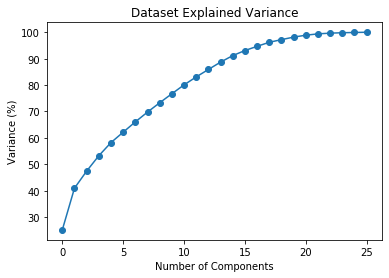

In [417]:
plt.figure()
plt.plot(cum_var_exp, marker = "o")
plt.xlabel('Number of Components')                             # Cumulative variance explained v/s no. of principal components
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [418]:
print(eig_val)
sorted(eig_val,reverse=True)
eigen_pairs=[(np.abs(eig_val[i]),eig_vec[:,i]) for i in range(len(eig_val))]
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)
eigen_values_sort=[eigen_pairs_sorted[i][0] for i in range(len(eig_val)) ]
eigen_vectors_sort=[eigen_pairs_sorted[i][1] for i in range(len(eig_val))]

[6.54574315 4.1053946  1.68286745 1.51338659 1.29413743 0.07010346
 0.04078447 0.02321488 0.02528454 0.13177682 0.18866922 0.24860382
 0.25986233 0.39731681 0.41556571 0.49749624 0.64071187 0.72518116
 0.73248619 0.78417364 1.02237333 1.01455955 0.96426276 0.9172374
 0.87268076 0.88699253]


In [419]:
P_reduce=np.array(eigen_vectors_sort[0:18]).transpose()
P_reduce

array([[ 6.85314591e-02,  3.15217008e-01,  2.63176373e-02,
         5.16375368e-02, -5.20931016e-02,  6.95126739e-02,
         7.57644229e-02, -2.00042435e-01, -9.54737839e-02,
        -2.00781736e-03,  6.07017591e-02, -1.22325874e-01,
         6.19835229e-02,  5.15129886e-01, -5.22860877e-01,
        -1.44526340e-02,  4.21209873e-01, -2.96919226e-01],
       [ 1.29474123e-02,  6.97428435e-02,  5.72419053e-01,
        -2.67630678e-02, -2.94248890e-01,  1.15330703e-01,
         1.34269717e-01, -1.42926745e-01,  7.18152106e-02,
         5.71849789e-03, -3.28261416e-02, -1.64708431e-02,
         2.44831161e-02,  3.00704266e-02,  8.64042815e-03,
         6.97621886e-01, -1.43528886e-01,  1.13165431e-01],
       [ 1.61111768e-01, -2.97680600e-01,  3.18474771e-02,
        -3.14647998e-03, -6.33851204e-03,  1.03481074e-02,
         3.67015108e-02, -2.14548864e-02, -8.68681401e-02,
         1.06078520e-02,  1.27924690e-02,  3.35164669e-02,
        -9.08604396e-02, -3.78798460e-01, -5.27499413e

In [420]:
P_reduce.shape

(26, 18)

In [421]:
proj_data_pca_1=np.dot(scaled_df1,P_reduce)
proj_data_pca_1.shape

(30000, 18)

In [422]:
pca_data=pd.DataFrame(proj_data_pca_1)
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.858592,-0.962888,-0.785811,-0.827153,-1.043544,-0.561245,-0.482312,-0.169825,-0.260394,-0.041141,-0.043899,0.449828,-0.574019,-2.765758,-1.629858,-1.161329,-0.200951,-0.100428
1,-0.733763,-2.161736,-1.622875,0.374884,-0.232719,-0.497390,-0.533917,-0.303629,0.027502,0.125895,0.148155,-0.170598,-0.070543,0.607415,0.543182,0.218159,0.640964,0.083386
2,-0.817991,-1.121615,-1.178796,-0.084798,-0.417705,-0.376881,-0.452864,-0.235293,0.027983,-0.122081,0.100765,-0.034543,-0.066347,-0.096796,0.374974,0.837086,0.145373,-0.112473
3,-0.169274,-0.861132,-0.024484,-0.506872,-1.413110,-0.576469,-0.429304,-0.477508,0.339641,-0.045973,-0.131303,0.132031,-0.059376,-0.364134,0.568266,-0.293724,-0.219178,0.190809
4,-0.816756,-0.118568,1.303416,0.730057,-2.097905,0.918645,0.906350,0.306359,1.146602,0.136996,-0.662793,0.365625,-1.011233,0.139395,1.101762,0.900763,-0.383566,0.465808


In [423]:
from sklearn.cluster import KMeans
cluster_inertia=[]
for i in range(1,15):
    model=KMeans(n_clusters=i)
    model.fit(pca_data)
    cluster_inertia.append(model.inertia_)

In [424]:
cluster_inertia

[750352.0022681883,
 628775.8041712986,
 548518.1113303343,
 518297.0604702633,
 492090.33583635173,
 465635.045604841,
 443465.8406024818,
 417021.3560515895,
 405796.3041262634,
 395675.22253664257,
 370779.88323492697,
 364288.89557671885,
 350135.9282841314,
 337878.4278743113]

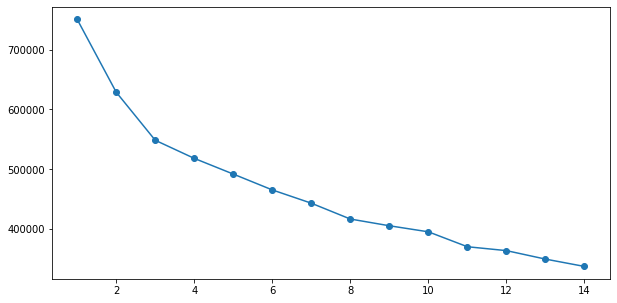

In [425]:
plt.figure(figsize=(10,5))
plt.plot(range(1,15),cluster_inertia,marker="o")
plt.show()

In [408]:
kmeans=KMeans(n_clusters=2,n_init=15,random_state=42)

In [409]:
kmeans.fit(pca_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [410]:
centroid=kmeans.cluster_centers_
pd.DataFrame(centroid)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,4.471997,1.380512,-0.011807,-0.308872,0.033693,-0.015877,0.001681,0.015091,0.007444,0.001519,-0.013255,0.018414,0.020062,-0.007542,-0.003807,-0.011954,-0.017232,-0.005199
1,-0.823649,-0.254262,0.002175,0.056888,-0.006206,0.002924,-0.000310,-0.002779,-0.001371,-0.000280,0.002441,-0.003391,-0.003695,0.001389,0.000701,0.002202,0.003174,0.000958


In [411]:
kmeans.inertia_

628775.5030542605

In [412]:
labs=kmeans.labels_
labs

array([1, 1, 1, ..., 1, 1, 1])

In [413]:
pdata=pca_data.copy()
pdata["class"]=kmeans.labels_

In [414]:
pdata["class"].value_counts()

1    25342
0     4658
Name: class, dtype: int64

In [415]:
df1["DEFAULT"].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [416]:
pred=kmeans.predict(pca_data)

In [746]:
data=pca_data.iloc[:,:]

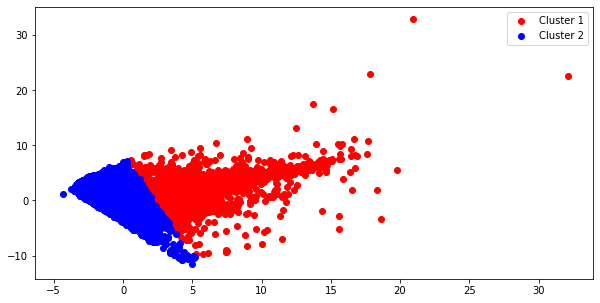

In [747]:
plt.figure(figsize=(10,5))
plt.scatter(data.iloc[pred==0,0],data.iloc[pred==0,1],color="red",label="Cluster 1")
plt.scatter(data.iloc[pred==1,0],data.iloc[pred==1,1],color="blue",label="Cluster 2")
plt.legend()

In [748]:
from sklearn.metrics import silhouette_score

In [749]:
silhouette_score(pca_data,kmeans.labels_)

0.3266314247895734

In [750]:
from sklearn.cluster import AgglomerativeClustering
modelagc=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
modelagc.fit(pca_data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [751]:
labels=pd.DataFrame(modelagc.labels_)

In [752]:
labels[0].value_counts()

0    22439
1     7561
Name: 0, dtype: int64

In [753]:
labeled=pca_data.copy()
labeled["class"]=modelagc.labels_

In [754]:
AGC=labeled.groupby(["class"])

In [755]:
x0=AGC.get_group(0)
x1=AGC.get_group(1)

c0=np.array(x0.mean())
c1=np.array(x1.mean())

c0=c0[:-1]
c1=c1[:-1]


In [756]:
agc_0=agc_1=agc_2=0
for i in np.arange(x0.shape[0]):
    agc_0=agc_0+np.sum((x0.iloc[i,:-1]-c0)**2)
for i in np.arange(x1.shape[0]):
    agc_1=agc_1+np.sum((x1.iloc[i,:-1]-c1)**2)

In [757]:
agc_0+agc_1

664897.4832539244

In [758]:
silhouette_score(pca_data,modelagc.labels_)

0.22563058715986833

In [759]:
from sklearn.model_selection import train_test_split

In [760]:
pca_data["class"]=modelagc.labels_

In [761]:
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,class
0,-1.858592,-0.962888,-0.785811,-0.827153,-1.043544,-0.561245,-0.482312,-0.169825,-0.260394,-0.041141,-0.043899,0.449828,-0.574019,-2.765758,-1.629858,-1.161329,-0.200951,-0.100428,0
1,-0.733763,-2.161736,-1.622875,0.374884,-0.232719,-0.497390,-0.533917,-0.303629,0.027502,0.125895,0.148155,-0.170598,-0.070543,0.607415,0.543182,0.218159,0.640964,0.083386,0
2,-0.817991,-1.121615,-1.178796,-0.084798,-0.417705,-0.376881,-0.452864,-0.235293,0.027983,-0.122081,0.100765,-0.034543,-0.066347,-0.096796,0.374974,0.837086,0.145373,-0.112473,0
3,-0.169274,-0.861132,-0.024484,-0.506872,-1.413110,-0.576469,-0.429304,-0.477508,0.339641,-0.045973,-0.131303,0.132031,-0.059376,-0.364134,0.568266,-0.293724,-0.219178,0.190809,1
4,-0.816756,-0.118568,1.303416,0.730057,-2.097905,0.918645,0.906350,0.306359,1.146602,0.136996,-0.662793,0.365625,-1.011233,0.139395,1.101762,0.900763,-0.383566,0.465808,0


In [762]:
x=pca_data.drop(["class"],axis=1)
y=pca_data["class"]

In [763]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [764]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [765]:
LR=LogisticRegression()
KNN = KNeighborsClassifier()
Dtree= DecisionTreeClassifier()
GradBo = GradientBoostingClassifier()
RF = RandomForestClassifier()

In [766]:
modellr=LR.fit(xtrain,ytrain)
ypredlr=modellr.predict(xtest)
print("train :",LR.score(xtrain,ytrain))
print("test :",LR.score(xtest,ytest))
print(classification_report(ytest,ypredlr))
print(accuracy_score(ytest,ypredlr))

train : 0.9292380952380952
test : 0.9332222222222222
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6726
           1       0.91      0.82      0.86      2274

    accuracy                           0.93      9000
   macro avg       0.92      0.90      0.91      9000
weighted avg       0.93      0.93      0.93      9000

0.9332222222222222


In [767]:
modeltree=Dtree.fit(xtrain,ytrain)
ytree=modeltree.predict(xtest)
print("train :",Dtree.score(xtrain,ytrain))
print("test :",Dtree.score(xtest,ytest))
print(accuracy_score(ytest,ytree))
print(classification_report(ytest,ytree))

train : 1.0
test : 0.9505555555555556
0.9505555555555556
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6726
           1       0.90      0.91      0.90      2274

    accuracy                           0.95      9000
   macro avg       0.93      0.94      0.93      9000
weighted avg       0.95      0.95      0.95      9000



In [768]:
modelrf=RF.fit(xtrain,ytrain)
ypredrf=modelrf.predict(xtest)
print("train :",RF.score(xtrain,ytrain))
print("test :",RF.score(xtest,ytest))
print(accuracy_score(ytest,ypredrf))
print(classification_report(ytest,ypredrf))

train : 1.0
test : 0.9687777777777777
0.9687777777777777
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6726
           1       0.95      0.93      0.94      2274

    accuracy                           0.97      9000
   macro avg       0.96      0.96      0.96      9000
weighted avg       0.97      0.97      0.97      9000



In [769]:
modelknn=KNN.fit(xtrain,ytrain)
ypredknn=modelknn.predict(xtest)
print("train :",KNN.score(xtrain,ytrain))
print("test :",KNN.score(xtest,ytest))
print(accuracy_score(ytest,ypredknn))
print(classification_report(ytest,ypredknn))

train : 0.9887619047619047
test : 0.9777777777777777
0.9777777777777777
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6726
           1       0.97      0.94      0.96      2274

    accuracy                           0.98      9000
   macro avg       0.98      0.96      0.97      9000
weighted avg       0.98      0.98      0.98      9000



In [770]:
import warnings
warnings.filterwarnings('ignore')
RF=RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)
RF_boost=AdaBoostClassifier(base_estimator=RF, n_estimators=90, random_state=0)
GBoost=GradientBoostingClassifier(n_estimators=100, random_state=0)

In [771]:
models=[]
models.append(('RandomForest', RF))
models.append(('RF_boost', RF_boost))
models.append(('GBoost', GBoost))

In [772]:
results=[]
names=[]
for name, model in models:
    skfold=StratifiedKFold(n_splits=10, random_state=0)
    cv_results=model_selection.cross_val_score(model, xtrain, ytrain, cv=skfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print('Mean weighted training f1-score')
    print(name, np.mean(cv_results))

Mean weighted training f1-score
RandomForest 0.969902119343168
Mean weighted training f1-score
RF_boost 0.9697694616658274
Mean weighted training f1-score
GBoost 0.9530408965784435


In [774]:
# The above are the overall(mean) weighted training f1 scores after applying Agglomerative Clusters on PCA data

In [775]:
results=[]
names=[]
for name, model in models:
    skfold=StratifiedKFold(n_splits=10, random_state=0)
    cv_results=model_selection.cross_val_score(model, xtest, ytest, cv=skfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print('Mean weighted training f1-score')
    print(name, np.mean(cv_results))

Mean weighted training f1-score
RandomForest 0.9626130555902499
Mean weighted training f1-score
RF_boost 0.9624766983292161
Mean weighted training f1-score
GBoost 0.9529668612425916


In [ ]:
# The above are the overall(mean) weighted testing f1 scores after applying Agglomerative Clusters on PCA data